<h1 align="center">Smart Agent Recruitment</h1>

**Smart Agent Recruitment Challenge**

FinMan is a Financial Distribution company. Over the last 10 years, they have created an offline distribution channel across India. They sell Financial products to consumers by hiring agents in their network. These agents are freelancers and get commission when they make a product sale.


**Overview of FinMan On-boarding process**

The Managers at FinMan are primarily responsible for recruiting agents. Once a manager has identified a potential applicant, the would explain the business opportunity to the agent. Once the agent provides the consent, an application is made to FinMan to become an agent. This date is known as application_receipt_date.

In the next 3 months, this potential agent has to undergo a 7 day training at the FinMan branch (about Sales processes and various products) and clear a subsequent examination in order to become a FinMan agent.


**The problem - Who are the best agents?**
 As is obvious in the above process, there is a significant investment which FinMan makes in identifying, training and recruiting these agents. However, there are a set of agents who do not bring in the expected resultant business. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_curve

from lightgbm import LGBMClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

from scipy.stats import randint as sp_randint

import warnings 
warnings.filterwarnings("ignore")

__Loading Datasets__

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print("Train Dataset has {} records and {} features".format(train.shape[0], train.shape[1]))
print("Test Dataset has {} records and {} features".format(test.shape[0], test.shape[1]))

Train Dataset has 9527 records and 23 features
Test Dataset has 5045 records and 22 features


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5045 non-null   object 
 1   Office_PIN                   5045 non-null   int64  
 2   Application_Receipt_Date     5045 non-null   object 
 3   Applicant_City_PIN           5011 non-null   float64
 4   Applicant_Gender             5023 non-null   object 
 5   Applicant_BirthDate          5022 non-null   object 
 6   Applicant_Marital_Status     5015 non-null   object 
 7   Applicant_Occupation         4041 non-null   object 
 8   Applicant_Qualification      5001 non-null   object 
 9   Manager_DOJ                  4221 non-null   object 
 10  Manager_Joining_Designation  4221 non-null   object 
 11  Manager_Current_Designation  4221 non-null   object 
 12  Manager_Grade                4221 non-null   float64
 13  Manager_Status    

<h2>1. Exploratory Data Analysis (EDA) </h2>

<h3> 1.1. Missing Values </h3>

There are a lot of missing values in both in **`train`** and **`test`** set. The features having missing values are :
* Applicant_City_PIN
* Applicant_Gender
* Applicant_BirthDate
* Applicant_Marital_Status
* Applicant_Occupation
* Applicant_Qualification
* Manager_DOJ
* Manager_Joining_Designation
* Manager_Current_Designation
* Manager_Grade
* Manager_Status                 
* Manager_Gender                 
* Manager_DoB                    
* Manager_Num_Application        
* Manager_Num_Coded              
* Manager_Business               
* Manager_Num_Products           
* Manager_Business2              
* Manager_Num_Products2

In [6]:
train.isnull().mean()

ID                             0.000000
Office_PIN                     0.000000
Application_Receipt_Date       0.000000
Applicant_City_PIN             0.010182
Applicant_Gender               0.007033
Applicant_BirthDate            0.007662
Applicant_Marital_Status       0.007662
Applicant_Occupation           0.128162
Applicant_Qualification        0.009027
Manager_DOJ                    0.071691
Manager_Joining_Designation    0.071691
Manager_Current_Designation    0.071691
Manager_Grade                  0.071691
Manager_Status                 0.071691
Manager_Gender                 0.071691
Manager_DoB                    0.071691
Manager_Num_Application        0.071691
Manager_Num_Coded              0.071691
Manager_Business               0.071691
Manager_Num_Products           0.071691
Manager_Business2              0.071691
Manager_Num_Products2          0.071691
Business_Sourced               0.000000
dtype: float64

In [7]:
test.isnull().mean()

ID                             0.000000
Office_PIN                     0.000000
Application_Receipt_Date       0.000000
Applicant_City_PIN             0.006739
Applicant_Gender               0.004361
Applicant_BirthDate            0.004559
Applicant_Marital_Status       0.005946
Applicant_Occupation           0.199009
Applicant_Qualification        0.008722
Manager_DOJ                    0.163330
Manager_Joining_Designation    0.163330
Manager_Current_Designation    0.163330
Manager_Grade                  0.163330
Manager_Status                 0.163330
Manager_Gender                 0.163330
Manager_DoB                    0.163330
Manager_Num_Application        0.163330
Manager_Num_Coded              0.163330
Manager_Business               0.163330
Manager_Num_Products           0.163330
Manager_Business2              0.163330
Manager_Num_Products2          0.163330
dtype: float64

<h3>1.2. Target Variable Distribution </h3>

The dataset is almost balanced with the classes, 0 having **65.7 %** records and 1 having **34.3%** records.

In [8]:
train['Business_Sourced'].value_counts(normalize=True)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

<AxesSubplot:xlabel='Business_Sourced', ylabel='count'>

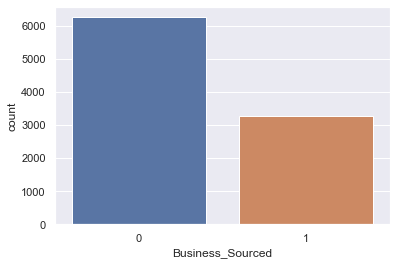

In [9]:
sns.countplot(x='Business_Sourced', data=train)

<h3>1.3. Numerical Feature Distribution</h3>

<i>The Numerical Features in the **`train`** set to be explored are the following :</i>
* Manager_Num_Application
* Manager_Num_Coded
* Manager_Business
* Manager_Num_Products
* Manager_Business2
* Manager_Num_Products2

<h3>1.3.1. Univariate Analysis </h3>

In [10]:
def UVA_numerical(df, num_feat):
    
    cols = len(num_feat)
    plt.figure(figsize = (7*cols,3), dpi = 100)
    
    for idx , feat in enumerate(num_feat) :
        
        # calculating descriptive statistics values of a feature
        min_val = df[feat].min()
        max_val = df[feat].max()
        ran = max_val - min_val
        
        mean_val = df[feat].mean()
        median_val = df[feat].median()
        std_dev = df[feat].std()
        skew = df[feat].skew()
        kurt = df[feat].kurtosis()
        
        # Calculating points of standard deviation
        std_points = mean_val+std_dev , mean_val-std_dev
        
        # PLotting the feature with the information
        plt.subplot(1, cols+1, idx+1)
        sns.kdeplot(x=feat, data=train, shade=True)
        sns.lineplot(x=std_points, y=[0,0], color = 'black', label = "std_dev")
        sns.scatterplot(x=[min_val,max_val], y=[0,0], color = 'orange', label = "min/max")
        sns.scatterplot(x=[mean_val], y=[0], color = 'red', label = "mean")
        sns.scatterplot(x=[median_val], y=[0], color = 'blue', label = "median")
        plt.xlabel('{}'.format(feat), fontsize = 20)
        plt.ylabel('density')
        plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(std_points[0],2),round(std_points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(min_val,2),round(max_val,2),round(ran,2)),
                                                                                                   round(mean_val,2),
                                                                                                   round(median_val,2)))

__Train Dataset__

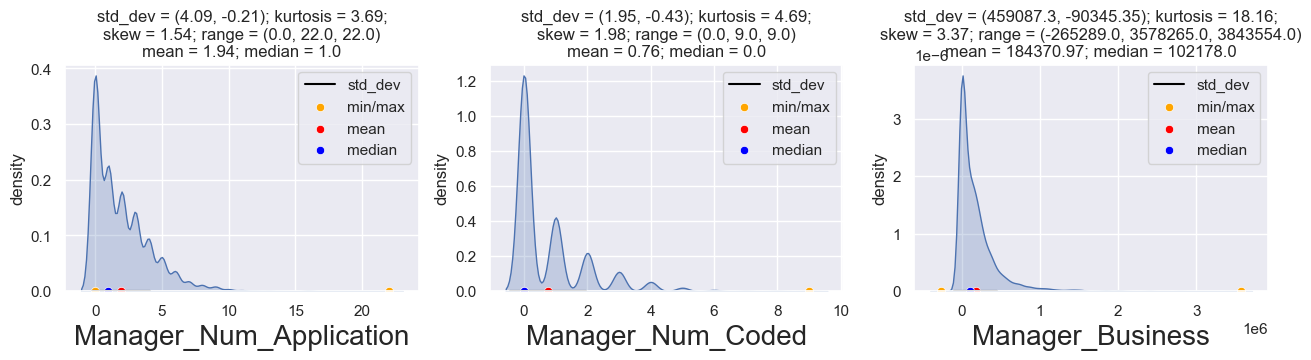

In [11]:
UVA_numerical(train, ['Manager_Num_Application','Manager_Num_Coded', 'Manager_Business'])

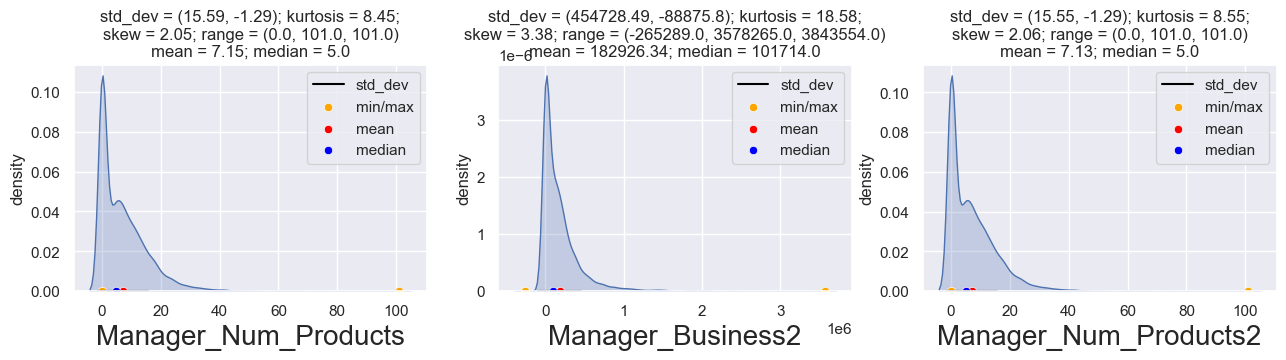

In [12]:
UVA_numerical(train, ['Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2'])

__Test Dataset__

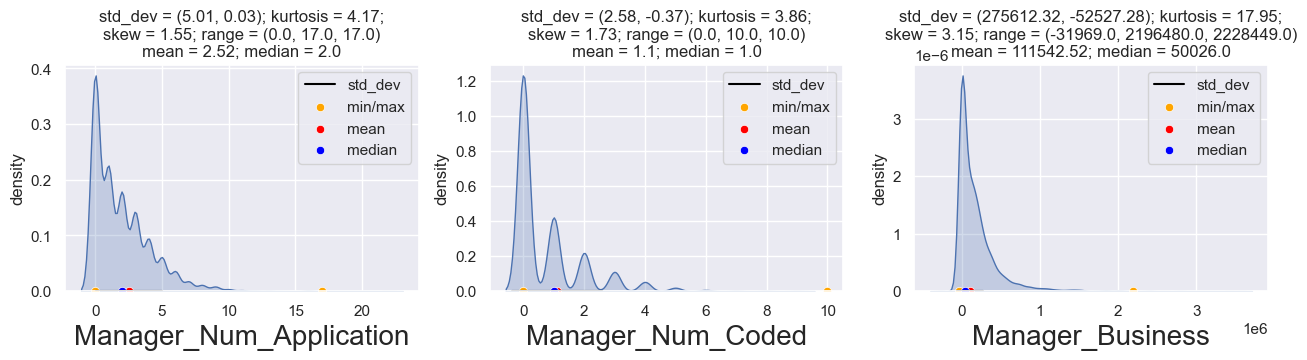

In [13]:
UVA_numerical(test, ['Manager_Num_Application','Manager_Num_Coded', 'Manager_Business'])

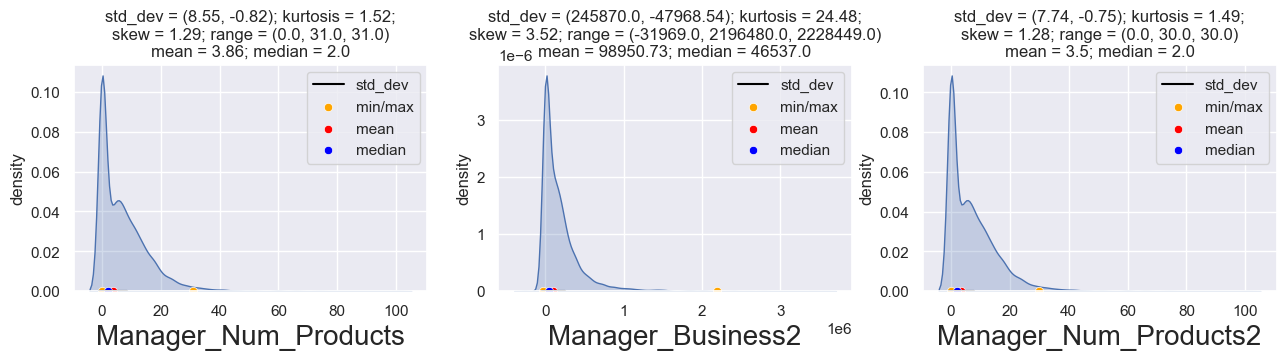

In [14]:
UVA_numerical(test, ['Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2'])

<h3>1.3.2. Outliers</h3>

In [15]:
def detect_outliers(df, num_feats):
    
    plt.figure(figsize=(7*len(num_feats), 4))
    
    for index, feat in enumerate(num_feats) :
        plt.subplot(1, 3, index+1)
        sns.boxplot(train[feat])
        plt.xlabel('{}'.format(feat), fontsize = 20)
    
    return

__Train Dataset__

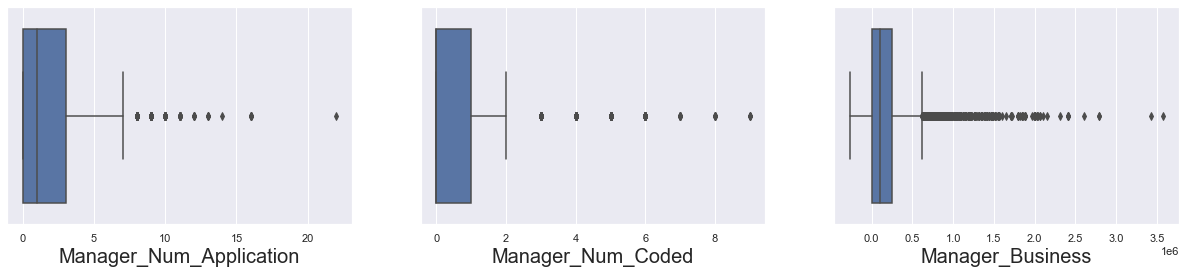

In [16]:
detect_outliers(train, ['Manager_Num_Application','Manager_Num_Coded', 'Manager_Business'])

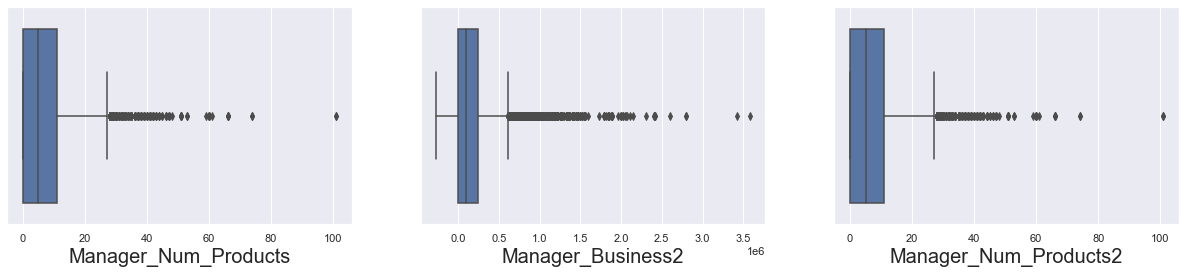

In [17]:
detect_outliers(train, ['Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2'])

__Test Dataset__

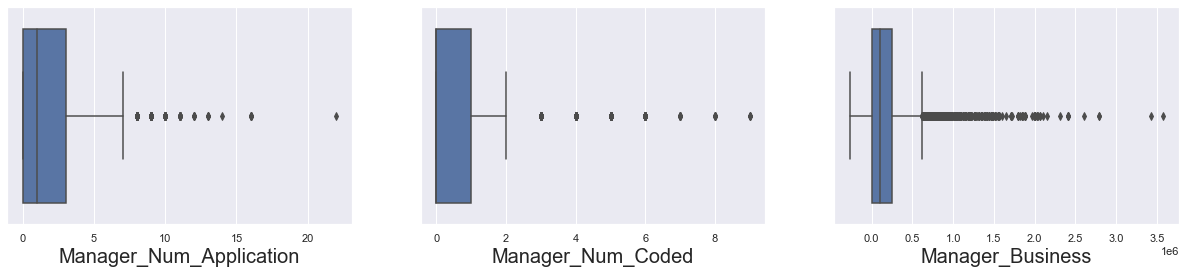

In [18]:
detect_outliers(train, ['Manager_Num_Application','Manager_Num_Coded', 'Manager_Business'])

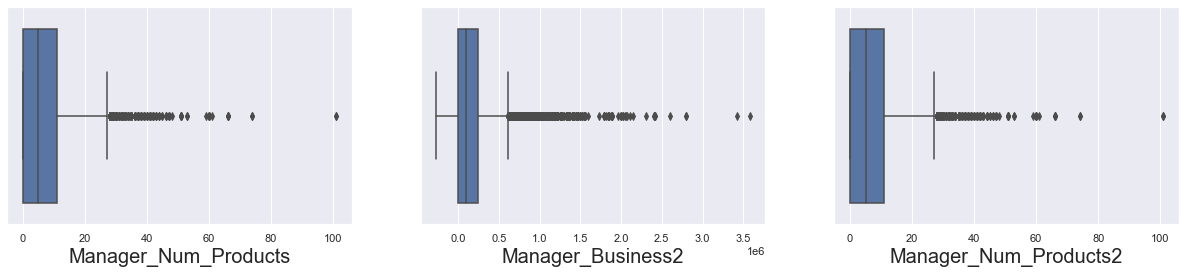

In [19]:
detect_outliers(train, ['Manager_Num_Products','Manager_Business2', 'Manager_Num_Products2'])

<h3>1.4. Correlations</h3>

The features **Manager_Business** and **Manager_Business2** are highly coorelated. Similarly a high correlation is observed between **Manager_Num_Products** and **Manager_Num_Products2**. <br>
In order to remove multi-colinearity the columns **Manager_Business2** and **Manager_Num_Products2** will be dropped.

In [20]:
num_feats = ["Manager_Num_Application", "Manager_Num_Coded", "Manager_Business", "Manager_Num_Products",
"Manager_Business2", "Manager_Num_Products2", "Business_Sourced"]

<AxesSubplot:title={'center':'Train Dataset Correlations'}>

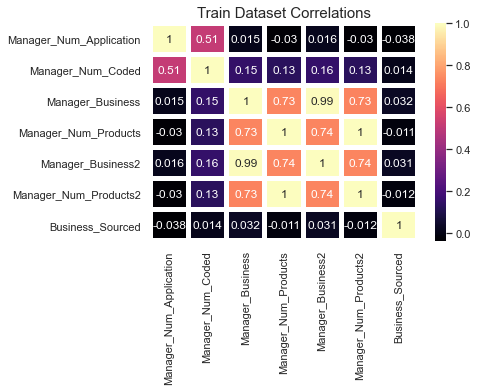

In [21]:
correlation_train = train[num_feats].corr(method = 'pearson')
plt.title("Train Dataset Correlations", fontsize=15)
sns.heatmap(correlation_train, linewidth = 4, annot=True, cmap='magma')

As expected there will be a strong correlation between **Manager_Num_Products** and **Manager_Business**. As the number of products sold increases the amount of business sourced will also increase.

<AxesSubplot:xlabel='Manager_Business', ylabel='Manager_Num_Products'>

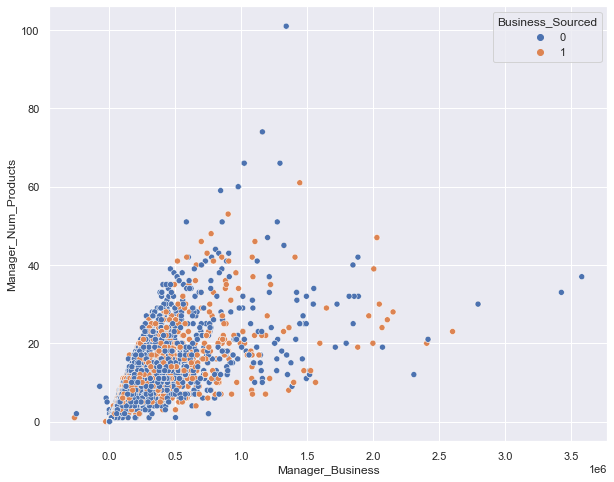

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Manager_Business', y='Manager_Num_Products', data=train, hue='Business_Sourced')

<h3>1.5. Categorical Distribution</h3>

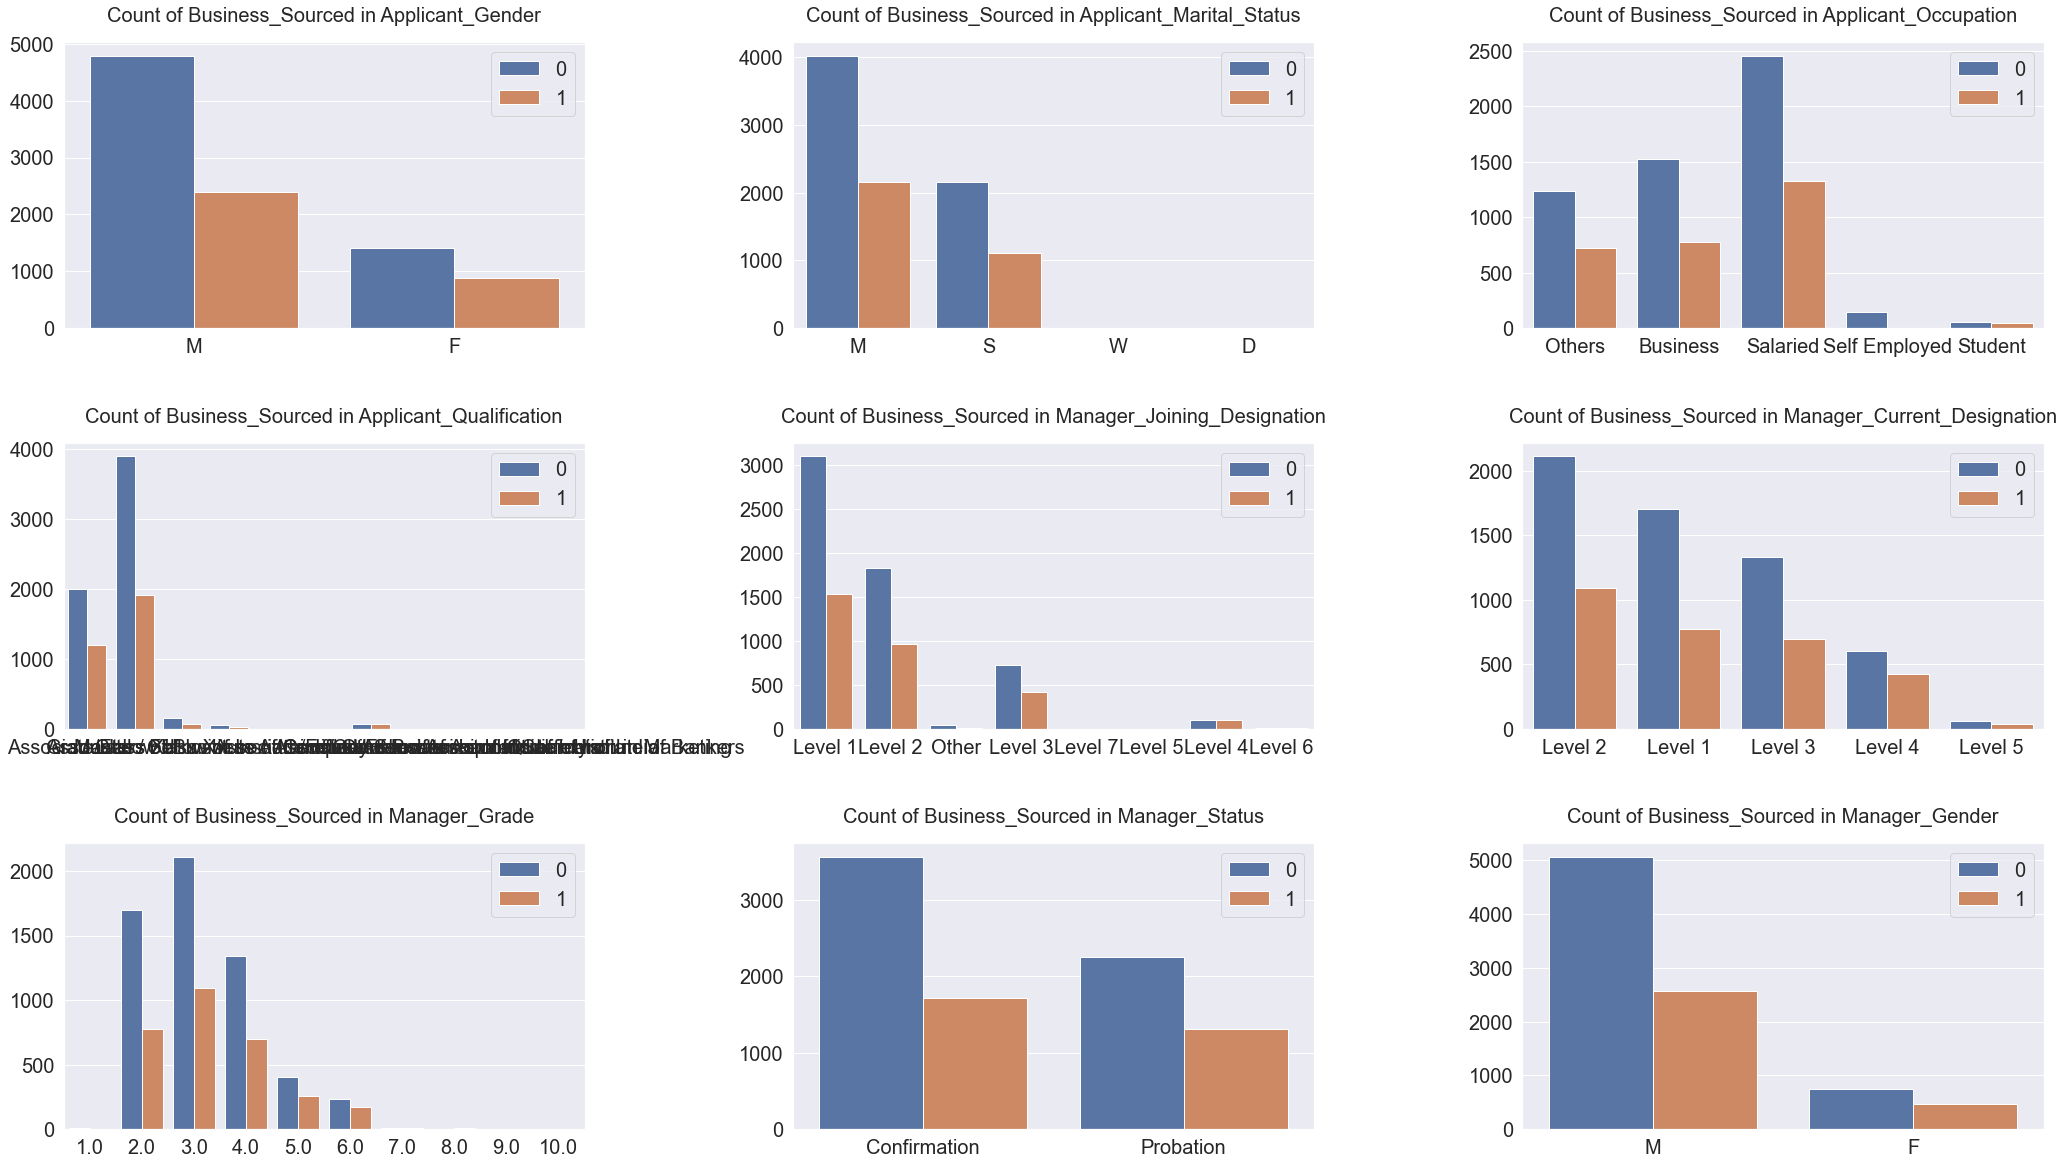

In [23]:
categorical_feat = ["Applicant_Gender", "Applicant_Marital_Status","Applicant_Occupation", 
                    "Applicant_Qualification", "Manager_Joining_Designation","Manager_Current_Designation"
                    ,"Manager_Grade","Manager_Status","Manager_Gender"]

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20,20))
plt.subplots_adjust(right=1.5, wspace=0.4, hspace=0.4)

for i , col in enumerate(categorical_feat) :
    plt.subplot(3, 3, i+1)
    # Distribution of Is Lead in feature
    sns.countplot(x= col, data = train, hue='Business_Sourced')
    plt.xlabel('')
    plt.ylabel('')
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title('Count of Business_Sourced in {}'.format(col), size=20, y=1.05)
        
plt.show()

Text(0.5, 0, 'Applicant Qualification')

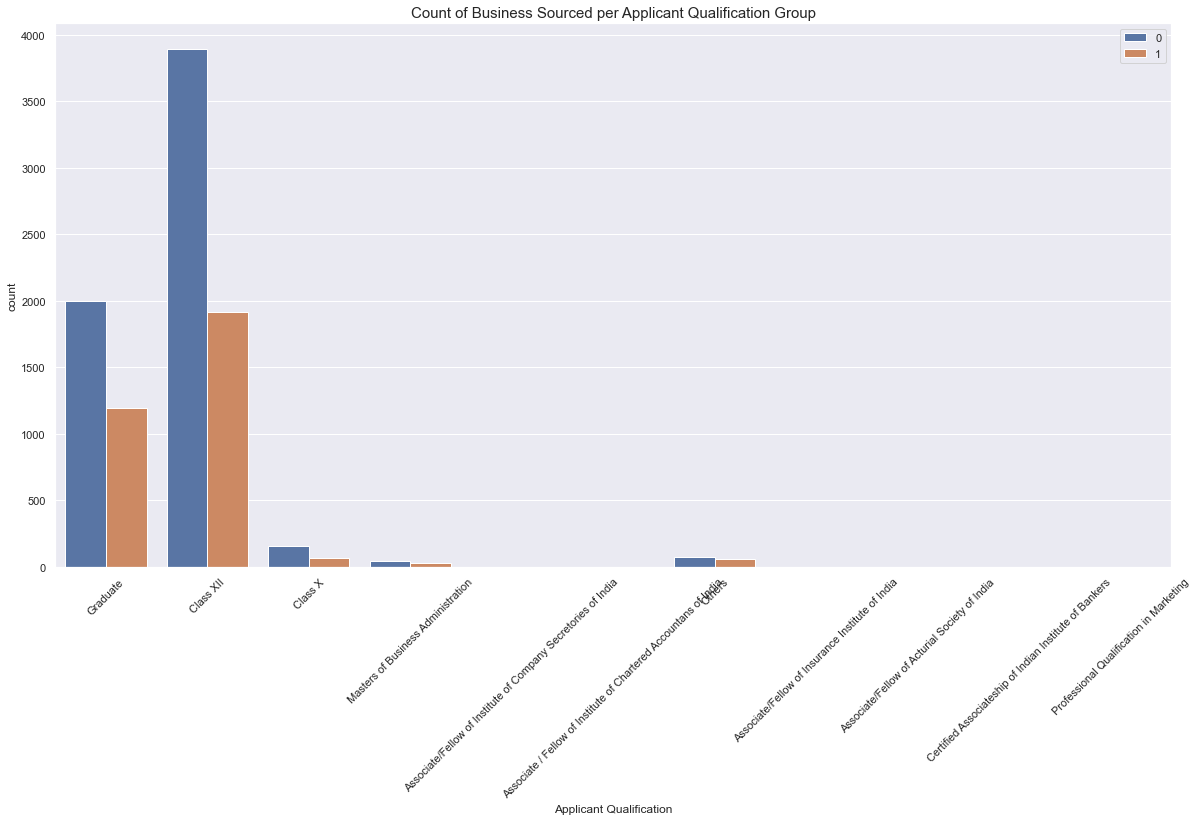

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(x='Applicant_Qualification', data=train, hue='Business_Sourced')
plt.tick_params(axis='x', labelrotation=45)
plt.title("Count of Business Sourced per Applicant Qualification Group", fontsize=15)
plt.legend(loc='upper right')
plt.xlabel("Applicant Qualification")

In [25]:
#train.info()

#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)
#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)
#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)
#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)
#train['Age_Group'] = train['Age'].apply(lambda x : (math.floor(x/10)+1)*10)

<h3>1.6. DataType of features</h3>

The data type of the date columns **'Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DoB', 'Manager_DOJ'** are not in datetime. The datatype conversion of the columns will be done in the data cleaning step.

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [27]:
train['Application_Receipt_Date'] = pd.to_datetime(train['Application_Receipt_Date'])
test['Application_Receipt_Date'] = pd.to_datetime(test['Application_Receipt_Date'])

<h3> 1.7. Insights around the features</h3>

In [28]:
# Dictionary containing the month names

Calender_Month_Name = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

<h3>1.7.1. Number of applications received per Application_Receipt_Date</h3>

The peak number of applications were received in the month of May, 2007. In initial months the number of applicatins received was low. However the number increased in the subsequent months.The a huge bulk of applications are received in the months starting from July till December in both the years of 2007 and 2008.

In [29]:
# Number of applications received per day. (More Granular data at day level)

num_applications_per_day = train.groupby(['Application_Receipt_Date'])['ID'].count().reset_index()
num_applications_per_day['App_Year'] = num_applications_per_day['Application_Receipt_Date'].dt.year
num_applications_per_day['App_Month'] = num_applications_per_day['Application_Receipt_Date'].dt.month
num_applications_per_day['App_Day'] = num_applications_per_day['Application_Receipt_Date'].dt.day
num_applications_per_day['App_Date_Num'] = num_applications_per_day['App_Year']*10000+num_applications_per_day['App_Month']*100+num_applications_per_day['App_Day']

num_applications_per_day.tail()

,Application_Receipt_Date,ID,App_Year,App_Month,App_Day,App_Date_Num
352,2008-06-26,17,2008,6,26,20080626
353,2008-06-27,17,2008,6,27,20080627
354,2008-06-28,13,2008,6,28,20080628
355,2008-06-30,15,2008,6,30,20080630
356,2008-07-01,18,2008,7,1,20080701


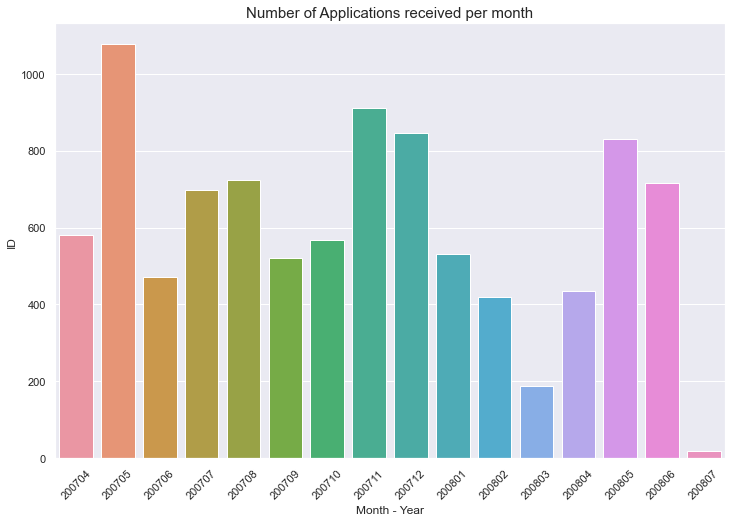

In [30]:
# Number of applications received per month-year. (More Granular data at day level)

num_app_month_year = num_applications_per_day.groupby(['App_Year', 'App_Month'])['ID'].sum().reset_index()
num_app_month_year['Month_Year'] = num_app_month_year['App_Year']*100+num_app_month_year['App_Month']

plt.figure(figsize=(12,8))
sns.barplot(x="Month_Year", y="ID", data=num_app_month_year)
plt.title("Number of Applications received per month", fontsize=15)
plt.xlabel("Month - Year")
plt.xticks(rotation=45)
plt.show()

In [31]:
num_app_month_year

,App_Year,App_Month,ID,Month_Year
0,2007,4,580,200704
1,2007,5,1077,200705
2,2007,6,471,200706
3,2007,7,697,200707
4,2007,8,723,200708
5,2007,9,522,200709
6,2007,10,567,200710
7,2007,11,912,200711
8,2007,12,845,200712
9,2008,1,530,200801


In [32]:
# Lookup table for plotting each year, month then day level data

app_year_month = num_applications_per_day[['App_Year', 'App_Month']].drop_duplicates()
app_year_month.shape

(16, 2)

Number of applications received at a day level



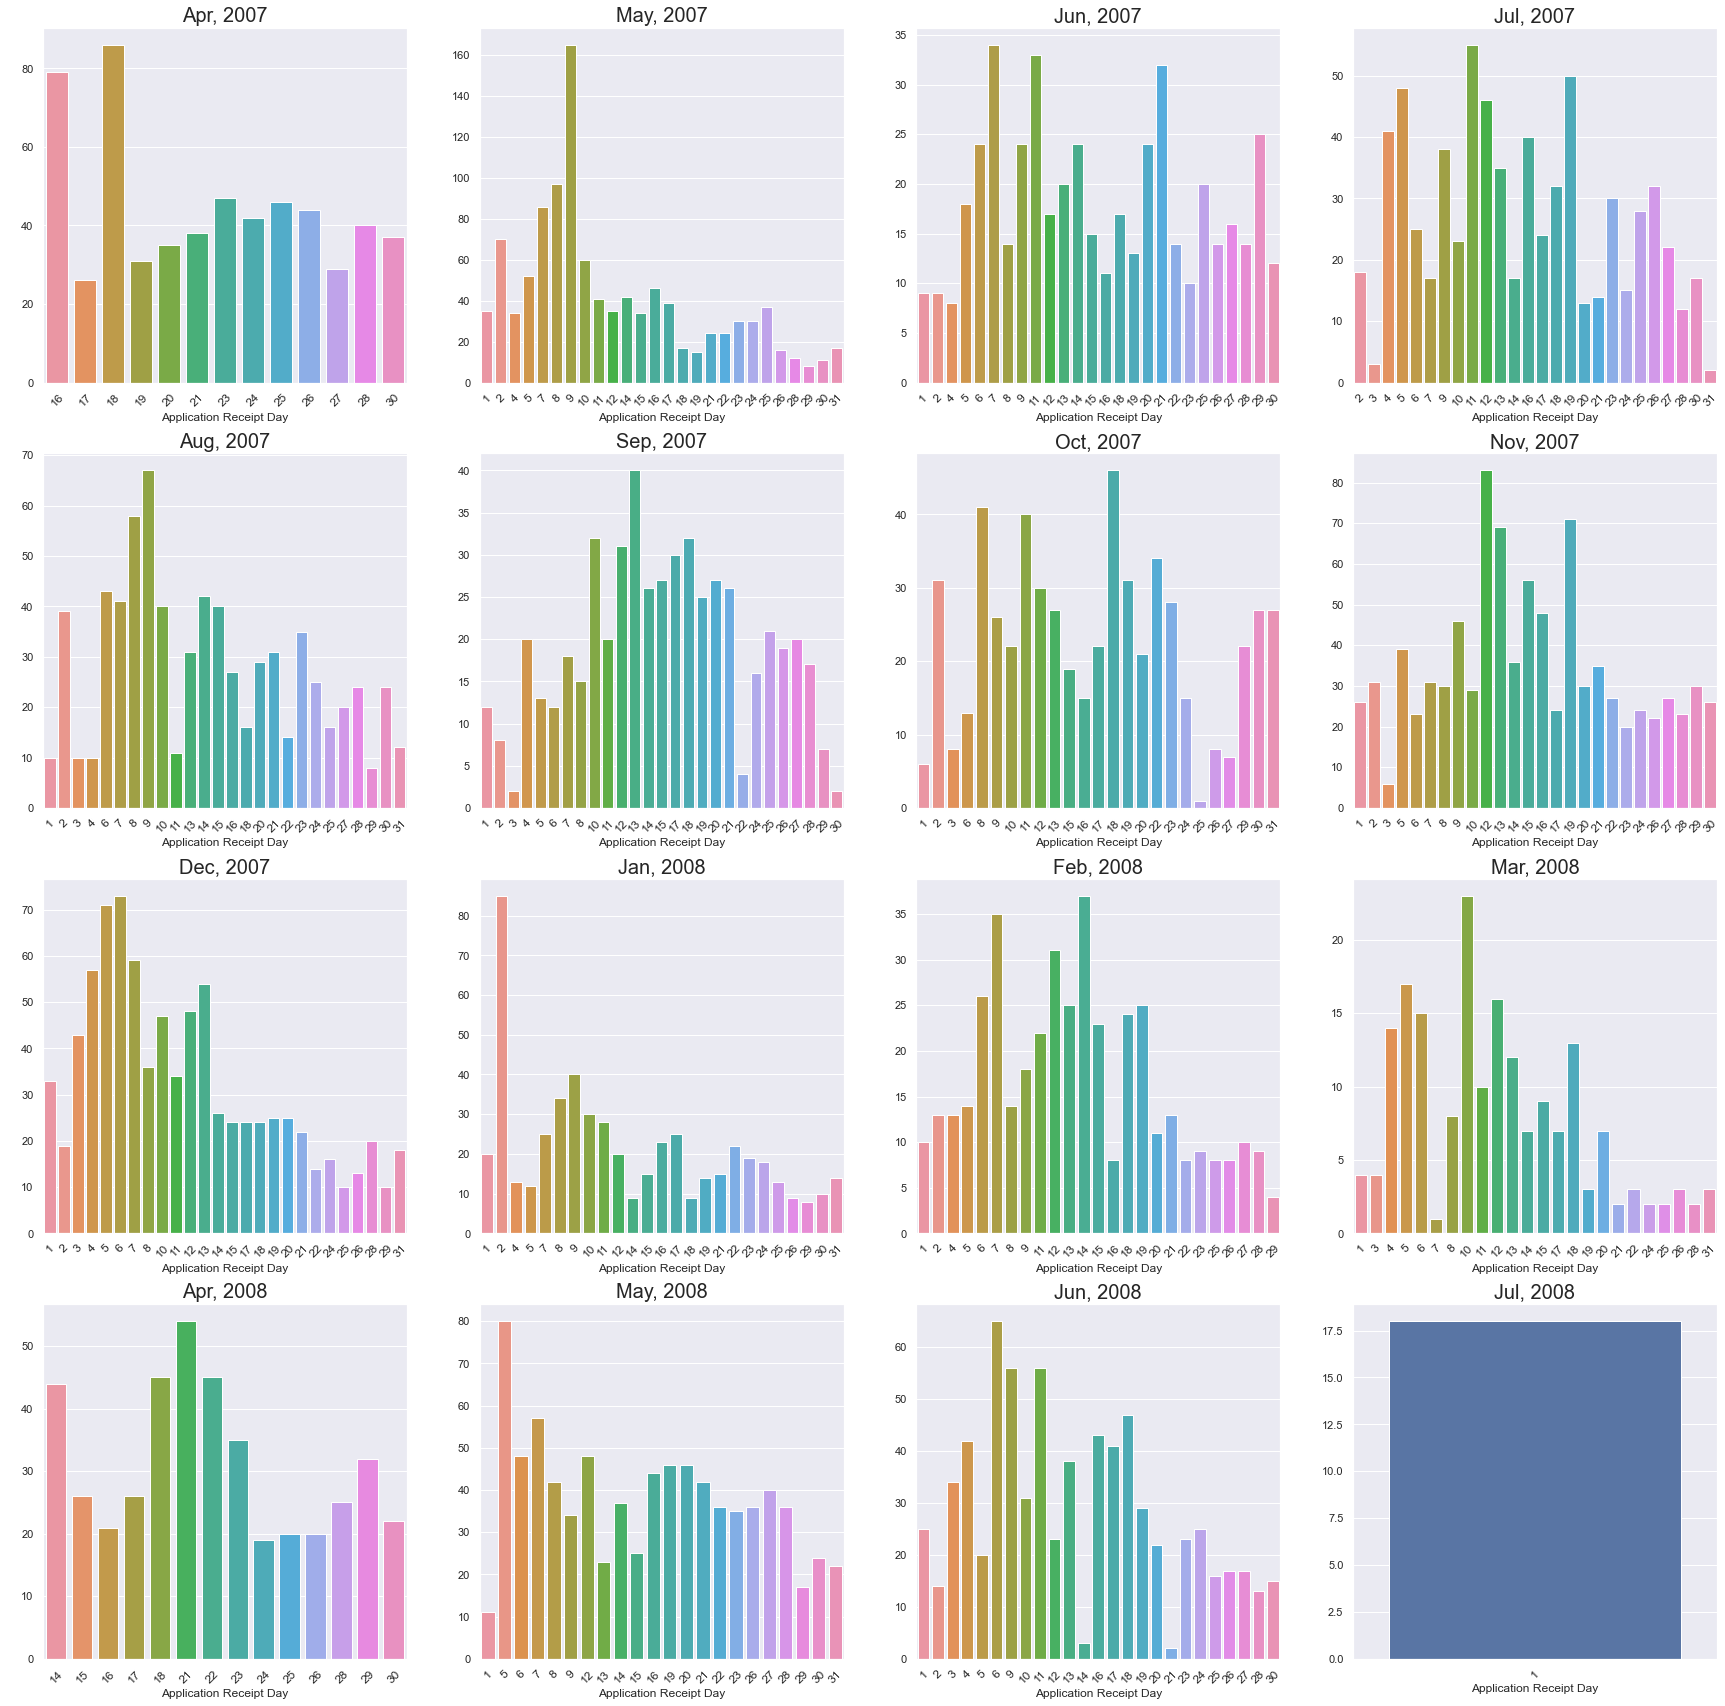

In [33]:
# Position of the plots for 16 months data covering both 2007 and 2008...

plot_locs = [[0,0], [0,1], [0,2], [0,3],
             [1,0], [1,1], [1,2], [1,3],
             [2,0], [2,1], [2,2], [2,3],
             [3,0], [3,1], [3,2], [3,3]]

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,30))
fig.subplots_adjust(wspace=0.2,  hspace=0.2)

print("Number of applications received at a day level")
print()

for i , row in enumerate(app_year_month.iterrows()):
    
    year = row[1][0]
    month = row[1][1]
    
    num_app_at_year_month = num_applications_per_day[
        (num_applications_per_day['App_Year']==year) & (num_applications_per_day['App_Month']==month)]
    
    plot_x = plot_locs[i][0]
    plot_y = plot_locs[i][1]
    
    sns.barplot(x="App_Day", y="ID", data=num_app_at_year_month, ax=axs[plot_x][plot_y])
    axs[plot_x][plot_y].set_title("{}, {}".format(Calender_Month_Name.get(month),year), fontsize=20)
    axs[plot_x][plot_y].tick_params(axis='x', labelrotation=45, labelsize=12)
    axs[plot_x][plot_y].set_ylabel(" ")
    axs[plot_x][plot_y].set_xlabel("Application Receipt Day")

We have an idea about the number of applications received per day and the trend of the volumne of applications received throughout the year.<br> **Now let's investigate the trend of the number of products sold by the Manager in the last 3 months at the time of the application receipt date, to get an idea of the sucessfull and relatively failure months of business.** 

<h3>1.7.2. Number of Products sold by the Manager in last 3 months at the time of Application_Receipt_Date</h3>

In [34]:
Sales = train.groupby(['Application_Receipt_Date', 'Business_Sourced'])['Manager_Num_Products'].sum().reset_index()

# Year, Month and Day extraction from Application_Receipt_Date.
Sales['App_Year'] = Sales['Application_Receipt_Date'].dt.year
Sales['App_Month'] = Sales['Application_Receipt_Date'].dt.month
Sales['App_Day'] = Sales['Application_Receipt_Date'].dt.day
Sales['App_Date_Num'] = Sales['App_Year']*10000+Sales['App_Month']*100+Sales['App_Day']
Sales['App_Day'] = Sales['App_Day'].astype('object')
Sales.head()

,Application_Receipt_Date,Business_Sourced,Manager_Num_Products,App_Year,App_Month,App_Day,App_Date_Num
0,2007-04-16,0,857.0,2007,4,16,20070416
1,2007-04-16,1,531.0,2007,4,16,20070416
2,2007-04-17,0,176.0,2007,4,17,20070417
3,2007-04-17,1,47.0,2007,4,17,20070417
4,2007-04-18,0,844.0,2007,4,18,20070418


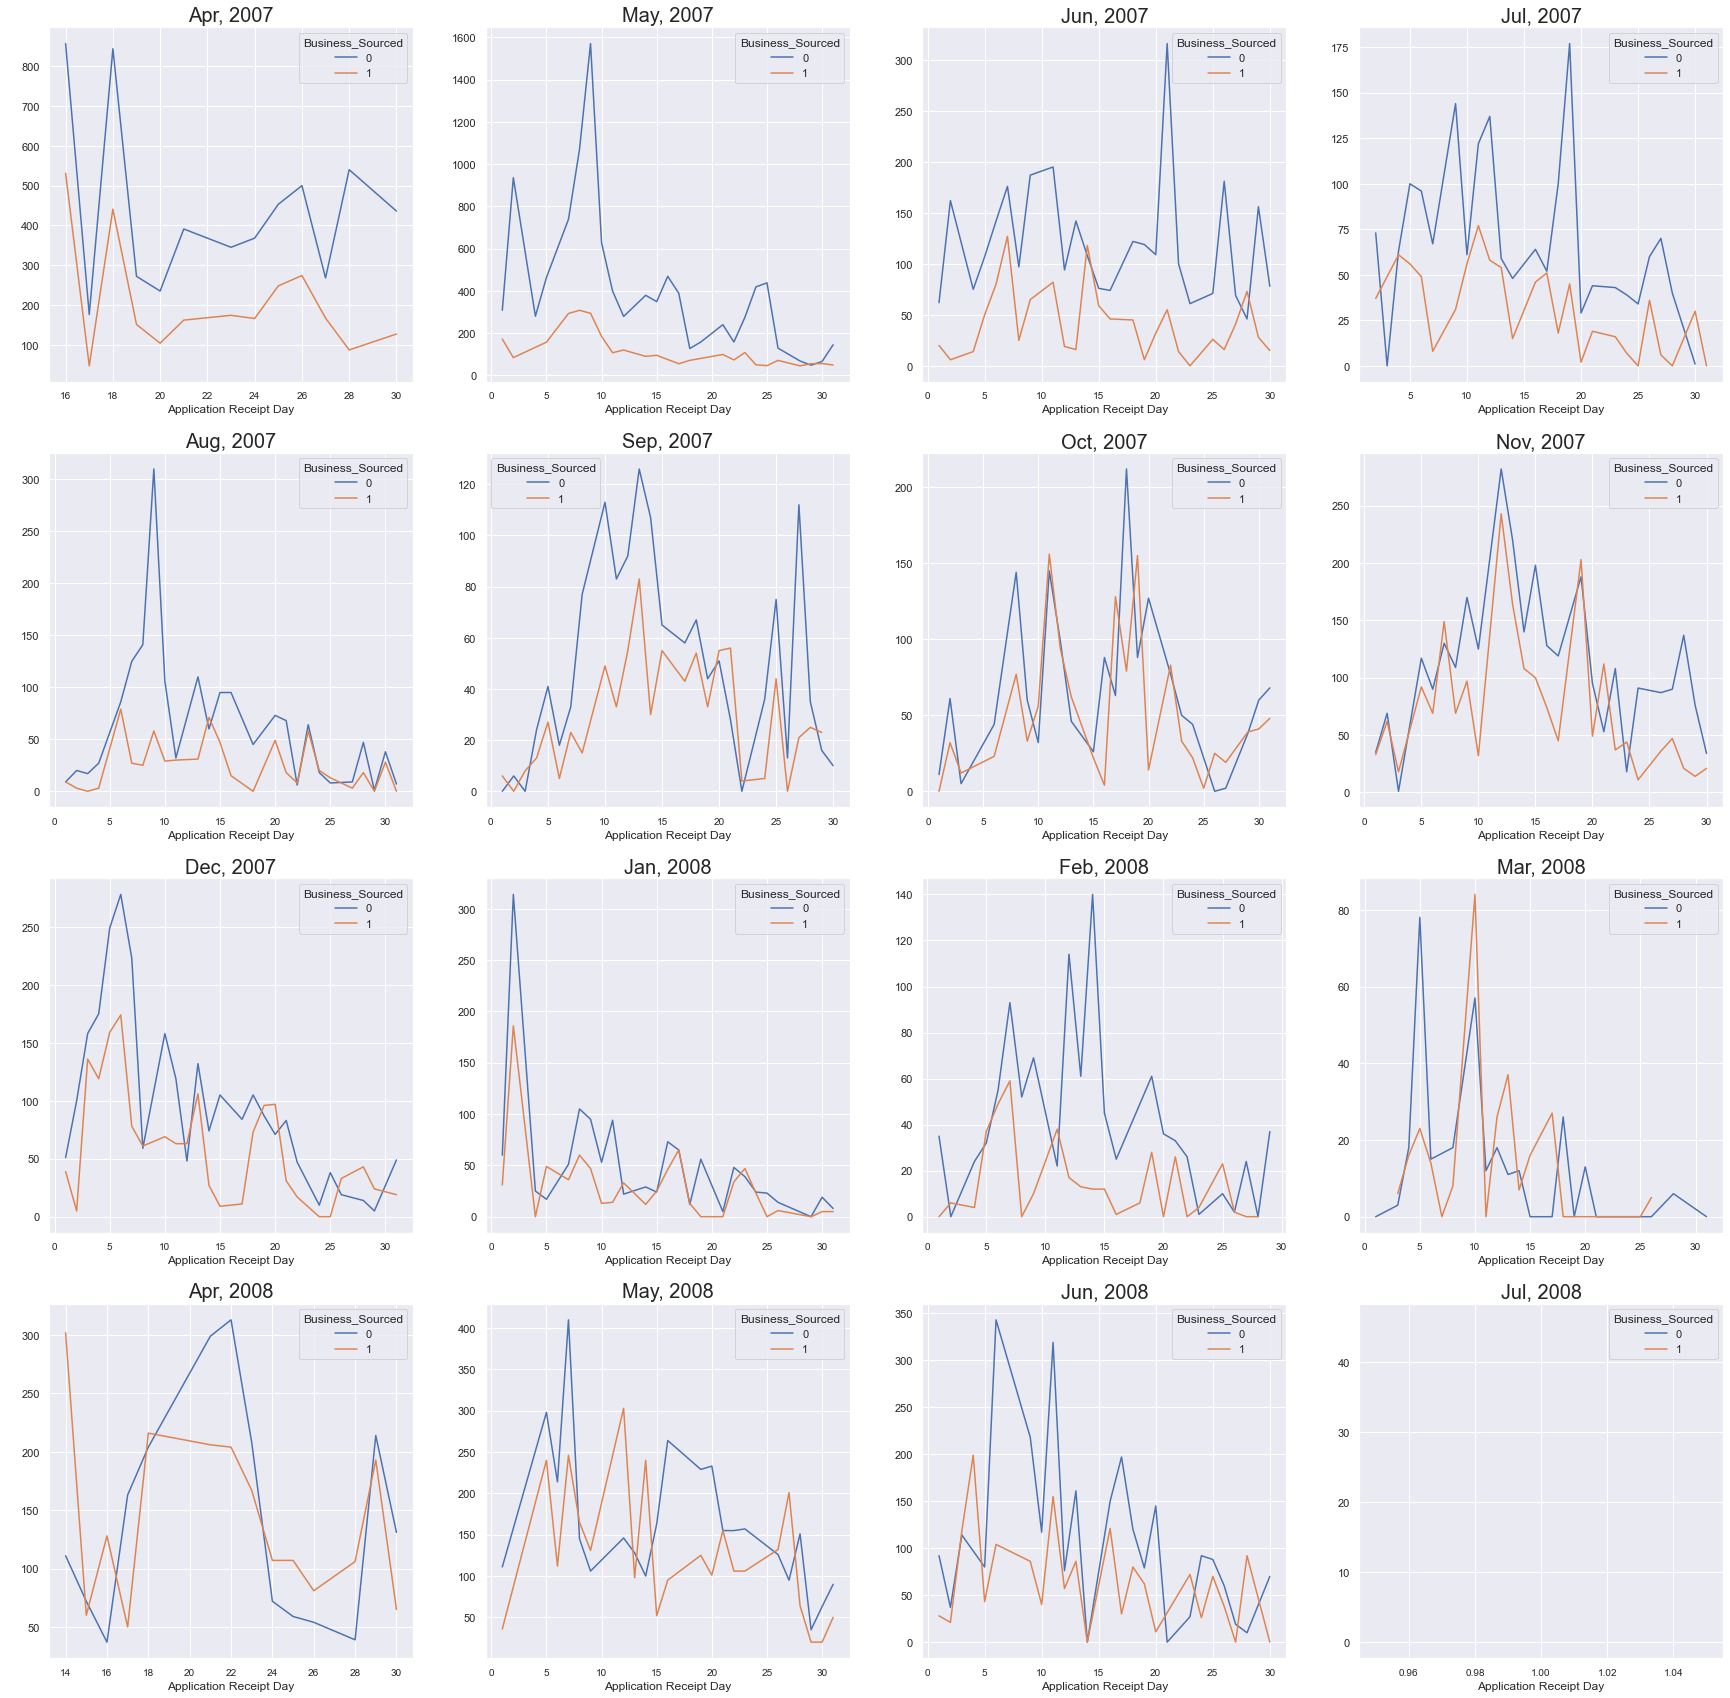

In [35]:
# Position of the plots for 16 months data covering both 2007 and 2008...

plot_locs = [[0,0], [0,1], [0,2], [0,3],
             [1,0], [1,1], [1,2], [1,3],
             [2,0], [2,1], [2,2], [2,3],
             [3,0], [3,1], [3,2], [3,3]]

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,30))
fig.subplots_adjust(wspace=0.2,  hspace=0.2) 


for i , row in enumerate(app_year_month.iterrows()):
    
    year = row[1][0]
    month = row[1][1]
    
    sales_at_year_month = Sales[(Sales['App_Year']==year) & (Sales['App_Month']==month)]
    
    plot_x = plot_locs[i][0]
    plot_y = plot_locs[i][1]
    
    sns.lineplot(x="App_Day", y="Manager_Num_Products", data=sales_at_year_month, hue="Business_Sourced", ax=axs[plot_x][plot_y])
    axs[plot_x][plot_y].set_title("{}, {}".format(Calender_Month_Name.get(month),year), fontsize=20)
    axs[plot_x][plot_y].tick_params(axis='x', labelsize=10)
    axs[plot_x][plot_y].set_xlabel("Application Receipt Day")
    axs[plot_x][plot_y].set_ylabel(" ")

From the above visualization, it is observed that initially in the period of Apr - Aug 2007, the number of products sold where business was sourced is very lesser than the times when the business was not sourced. The number of products sold where business was sourced started to increase in September, 2007.<br>
The difference between the number of products sold between busniess sourced and non-soucred gradually decreased and this trend continued till March, 2008. There were instances where Number of products sold when business was sourced is more than that when not sourced.<br>
 **Now let's investigate each applications received throughout the time period, whether the agent was able to source business within 3 months after his / her training.** 

<h3>1.7.3. Status of applications per Application_Receipt_Date</h3>

In [36]:
# Business_Sourced = 1 for Business Sourced and 0 for not sourced

Application_0_1 = train[['ID', 'Application_Receipt_Date', 'Business_Sourced']]

# Calculating the sequence / record row number in which the application was received for each Application Receipt Date.

Application_0_1 = pd.concat([Application_0_1, Application_0_1.groupby(['Application_Receipt_Date']).cumcount()+1], 
                            axis=1)
Application_0_1.rename(columns={0: "App_Order"}, inplace=True)

# Year, Month and Day extraction from Application_Receipt_Date.

Application_0_1['App_Year'] = Application_0_1['Application_Receipt_Date'].dt.year
Application_0_1['App_Month'] = Application_0_1['Application_Receipt_Date'].dt.month
Application_0_1['App_Day'] = Application_0_1['Application_Receipt_Date'].dt.day
Application_0_1['App_Date_Num'] = Application_0_1['App_Year']*10000+Application_0_1['App_Month']*100+Application_0_1['App_Day']

In [37]:
Application_0_1.head()

,ID,Application_Receipt_Date,Business_Sourced,App_Order,App_Year,App_Month,App_Day,App_Date_Num
0,FIN1000001,2007-04-16,0,1,2007,4,16,20070416
1,FIN1000002,2007-04-16,1,2,2007,4,16,20070416
2,FIN1000003,2007-04-16,0,3,2007,4,16,20070416
3,FIN1000004,2007-04-16,0,4,2007,4,16,20070416
4,FIN1000005,2007-04-16,0,5,2007,4,16,20070416


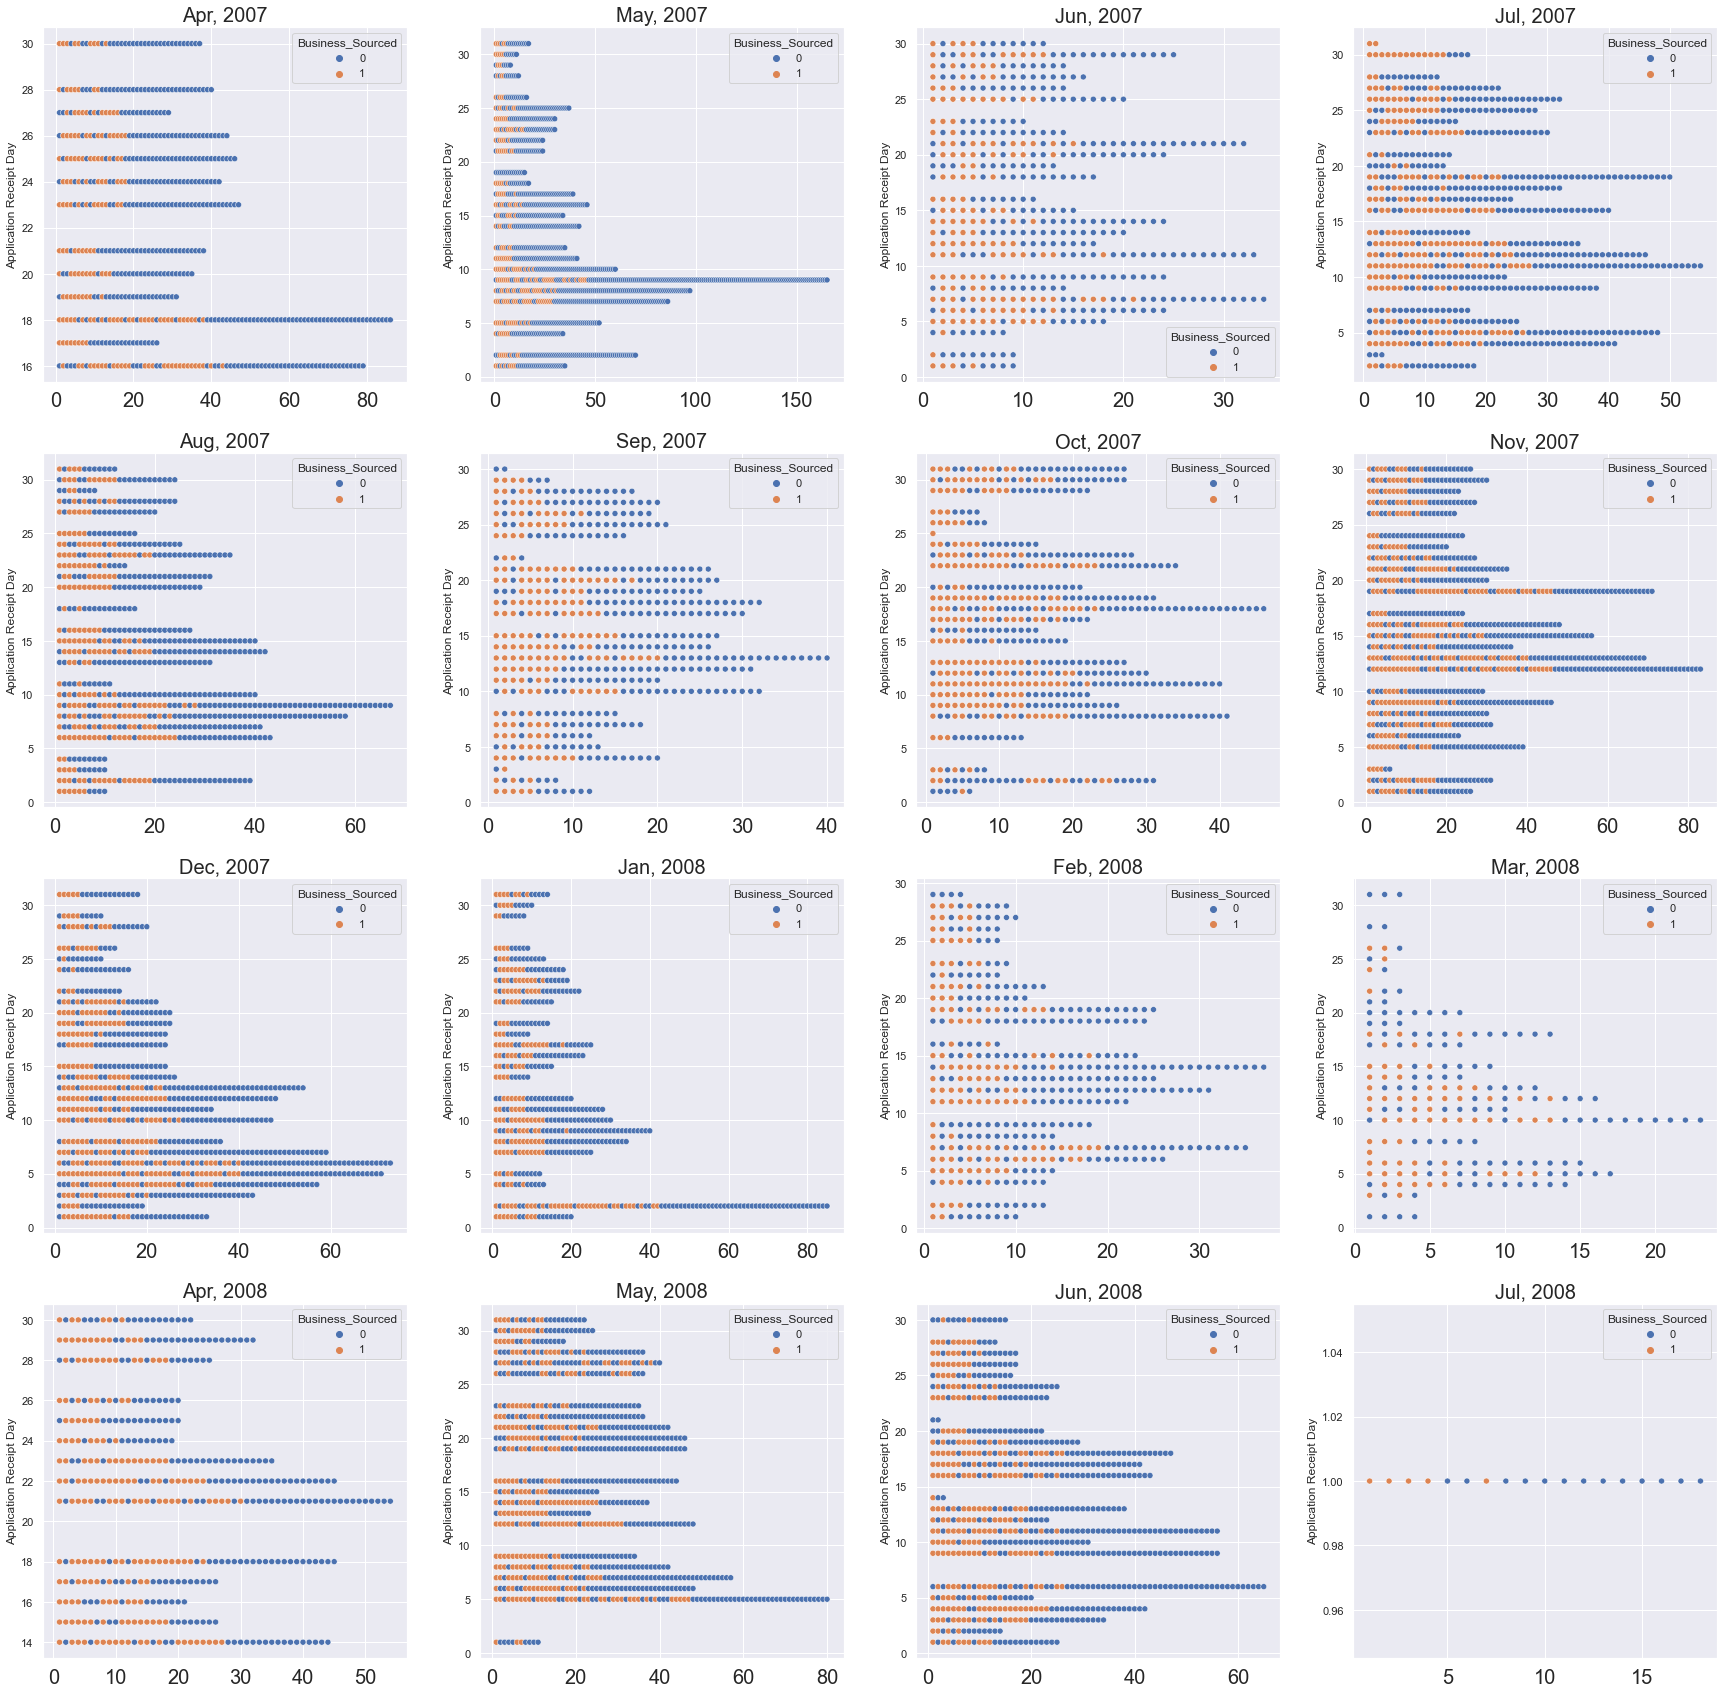

In [38]:
# Position of the plots 16 months data covering both 2007 and 2008...

plot_locs = [[0,0], [0,1], [0,2], [0,3],
             [1,0], [1,1], [1,2], [1,3],
             [2,0], [2,1], [2,2], [2,3],
             [3,0], [3,1], [3,2], [3,3]]

fig, axs = plt.subplots(ncols=4, nrows=4, figsize=(30,30))
fig.subplots_adjust(wspace=0.2,  hspace=0.2) 


for i , row in enumerate(app_year_month.iterrows()):
    
    year = row[1][0]
    month = row[1][1]
    
    app_at_year_month = Application_0_1[(Application_0_1['App_Year']==year) & (Application_0_1['App_Month']==month)]
    
    plot_x = plot_locs[i][0]
    plot_y = plot_locs[i][1]
    
    sns.scatterplot(x="App_Order", y="App_Day", data=app_at_year_month, hue="Business_Sourced", ax=axs[plot_x][plot_y])
    axs[plot_x][plot_y].set_title("{}, {}".format(Calender_Month_Name.get(month),year), fontsize=20)
    axs[plot_x][plot_y].tick_params(axis='x', labelsize=20)
    axs[plot_x][plot_y].set_xlabel(" ")
    axs[plot_x][plot_y].set_ylabel("Application Receipt Day")

From the above visualization, a trend is captured. For a particular day the agent's application which was received first or relatively at the beginning of the day was able to source business within 3 months post 7 day training. This pattern is observed across all the 16 months of the train dataset. This trend will be captured in a feature in the Feature Engineering step.

<h3>1.7.4. Business from Category A advisor</h3>

The business from **`Category A advisor`** will be the difference between the **`Manager_Business`** and **`Manager_Business2`** since,
- **`Manager_Business`** is the amount of business sourced by the manager in last 3 months, 
- **`Manager_Business2`** is the amount of business sourced by the manager in last 3 months excluding business from their Category A advisor

The number of products sold by **`Category A advisor`** in the last 3 months will be the difference between the **`Manager_Num_Products`** and **`Manager_Num_Products2`** since,
- **`Manager_Num_Products`** is Number of products sold by the manager in last 3 months
- **`Manager_Num_Products2`** is the number of products sold by the manager in last 3 months excluding business from their Category A advisor

In [39]:
Category_A_Business = train[['Manager_Business', 'Manager_Business2', 'Manager_Num_Products', 'Manager_Num_Products2']]

Category_A_Business['Num_Products_Category_A'] = Category_A_Business['Manager_Num_Products'] - Category_A_Business['Manager_Num_Products2']
Category_A_Business['Business_Sourced_Category_A'] = Category_A_Business['Manager_Business'] - Category_A_Business['Manager_Business2']

Category_A_Business.head()

,Manager_Business,Manager_Business2,Manager_Num_Products,Manager_Num_Products2,Num_Products_Category_A,Business_Sourced_Category_A
0,335249.0,335249.0,28.0,28.0,0.0,0.0
1,335249.0,335249.0,28.0,28.0,0.0,0.0
2,357184.0,357184.0,24.0,24.0,0.0,0.0
3,318356.0,318356.0,22.0,22.0,0.0,0.0
4,230402.0,230402.0,17.0,17.0,0.0,0.0


In [40]:
Category_A_Business[['Business_Sourced_Category_A', 'Num_Products_Category_A']].describe()

,Business_Sourced_Category_A,Num_Products_Category_A
count,8.844000e+03,8844.000000
mean,1.444629e+03,0.021031
std,2.900961e+04,0.397050
min,-1.741280e+05,-10.000000
25%,0.000000e+00,0.000000
50%,0.000000e+00,0.000000
75%,0.000000e+00,0.000000
max,1.095701e+06,12.000000


In [41]:
Category_A_Business[(Category_A_Business['Manager_Business'] < Category_A_Business['Manager_Business2'])]

,Manager_Business,Manager_Business2,Manager_Num_Products,Manager_Num_Products2,Num_Products_Category_A,Business_Sourced_Category_A
8261,903508.0,931085.0,41.0,43.0,-2.0,-27577.0
9195,208208.0,257384.0,6.0,9.0,-3.0,-49176.0
9240,208208.0,257384.0,6.0,9.0,-3.0,-49176.0
9266,767162.0,941290.0,34.0,44.0,-10.0,-174128.0


The features **Manager_Business** and **Manager_Business2** are highly coorelated. Similarly a high correlation is observed between **Manager_Num_Products** and **Manager_Num_Products2**. <br>
In order to remove multi-colinearity the columns **Manager_Business2** and **Manager_Num_Products2** will be dropped.

<h2>2. Data Preprocessing</h2>

In [42]:
train.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

<h3>2.1. Missing Value Imputation</h3>

In [43]:
# Filling missing values of numerical features with an arbitrary value.

num_cols = ['Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business' , 'Manager_Num_Products', 
            'Manager_Business2', 'Manager_Num_Products2', 'Applicant_City_PIN']

for col in num_cols :
    train[col] = train[col].fillna(-999)
    test[col] = test[col].fillna(-999)

In [44]:
# Filling missing values of date features with an arbitrary value.

date_cols = ['Application_Receipt_Date', 'Applicant_BirthDate', 'Manager_DoB', 'Manager_DOJ']

for date_col in date_cols :
    train[date_col] = train[date_col].fillna("1/1/1900")
    test[date_col] = test[date_col].fillna("1/1/1900")

In [45]:
# Filling missing values of categorical features with an arbitrary value.

agent_manager_details = ['Applicant_City_PIN', 'Applicant_Marital_Status', 'Applicant_Occupation',
                         'Applicant_Qualification', 'Manager_Joining_Designation', 'Manager_Current_Designation',
                         'Manager_Grade', 'Manager_Status', 'Manager_Gender']

for feat in agent_manager_details :
    train[feat] = train[feat].fillna("Missing")
    test[feat] = test[feat].fillna("Missing")

train['Applicant_Gender'] = train['Applicant_Gender'].fillna('Gender_NA')
test['Applicant_Gender'] = test['Applicant_Gender'].fillna('Gender_NA')

<h3>2.2. Data Type Conversion</h3>

In [46]:
# Converting date features from object to datetime to create new features from them in the feature engineering step.

date_cols = ['Applicant_BirthDate', 'Manager_DoB', 'Manager_DOJ']

for date_col in date_cols :
    train[date_col] = pd.to_datetime(train[date_col])
    test[date_col] = pd.to_datetime(test[date_col])

In [47]:
# Checking for any remaining features with missing values.

train.isnull().sum()

ID                             0
Office_PIN                     0
Application_Receipt_Date       0
Applicant_City_PIN             0
Applicant_Gender               0
Applicant_BirthDate            0
Applicant_Marital_Status       0
Applicant_Occupation           0
Applicant_Qualification        0
Manager_DOJ                    0
Manager_Joining_Designation    0
Manager_Current_Designation    0
Manager_Grade                  0
Manager_Status                 0
Manager_Gender                 0
Manager_DoB                    0
Manager_Num_Application        0
Manager_Num_Coded              0
Manager_Business               0
Manager_Num_Products           0
Manager_Business2              0
Manager_Num_Products2          0
Business_Sourced               0
dtype: int64

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9527 non-null   float64       
 4   Applicant_Gender             9527 non-null   object        
 5   Applicant_BirthDate          9527 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9527 non-null   object        
 7   Applicant_Occupation         9527 non-null   object        
 8   Applicant_Qualification      9527 non-null   object        
 9   Manager_DOJ                  9527 non-null   datetime64[ns]
 10  Manager_Joining_Designation  9527 non-null   object        
 11  Manager_Current_Designation  9527 non-null 

<h2>3. Feature Engineering</h2>

In [49]:
def get_distribution_plot(feat):
    
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8,5))
    fig.subplots_adjust(right=1.5)

    sns.distplot(x=train[feat], ax=axs[0])
    axs[0].set_title("{} Distribution in train dataset".format(feat), fontsize=15)

    sns.distplot(x=test[feat], ax=axs[1])
    axs[1].set_title("{} Distribution in test dataset".format(feat), fontsize=15)

    plt.show()
    
    return

<h3>3.1. Age of the Applicant / Agent</h3>

In [50]:
train['Agent_Age'] = ((train['Application_Receipt_Date'] - train['Applicant_BirthDate'])/np.timedelta64(1, 'D'))/365
test['Agent_Age'] = ((test['Application_Receipt_Date'] - test['Applicant_BirthDate'])/np.timedelta64(1, 'D'))/365

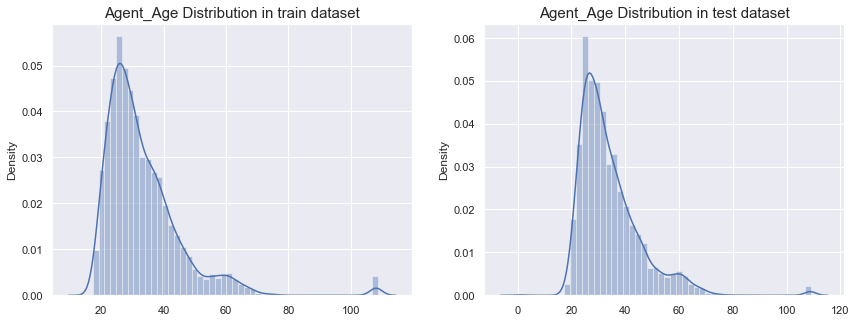

In [51]:
get_distribution_plot("Agent_Age")

<h3>3.2. Age of the Manager</h3>

In [52]:
train['Manager_Age'] = ((train['Application_Receipt_Date'] - train['Manager_DoB'])/np.timedelta64(1, 'D'))/365
test['Manager_Age'] = ((test['Application_Receipt_Date'] - test['Manager_DoB'])/np.timedelta64(1, 'D'))/365

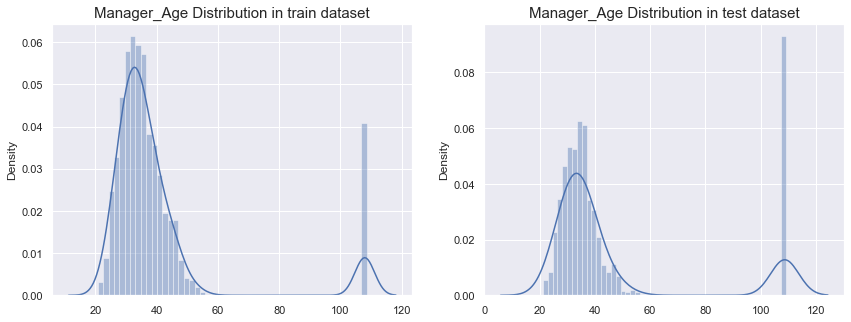

In [53]:
get_distribution_plot("Manager_Age")

<h3>3.3. Manager's Experience in FinMan</h3>

In [54]:
train['Manager_Exp'] = ((train['Application_Receipt_Date'] - train['Manager_DOJ'])/np.timedelta64(1, 'D'))/365
test['Manager_Exp'] = ((test['Application_Receipt_Date'] - test['Manager_DOJ'])/np.timedelta64(1, 'D'))/365

<h3>3.4. App_Order_percent</h3>

In [55]:
def get_App_Seq(df):
    
    cols= ['ID', 'Application_Receipt_Date']
    
    Applications = df[cols]
    Applications = pd.concat([Applications, Applications.groupby(['Application_Receipt_Date']).cumcount()+1], axis=1)
    Applications.rename(columns={0: "App_Order"}, inplace=True)
    max_app_seq = Applications.groupby(['Application_Receipt_Date'])['App_Order'].max().reset_index()
    min_app_seq = Applications.groupby(['Application_Receipt_Date'])['App_Order'].min().reset_index()

    max_min_seq = pd.merge(max_app_seq, min_app_seq , how='inner' , on='Application_Receipt_Date')
    max_min_seq.rename(columns={'App_Order_x' : 'Max_Seq', 'App_Order_y' : 'Min_Seq'}, inplace=True)

    max_min_seq['Range_Seq'] = max_min_seq['Max_Seq'] - max_min_seq['Min_Seq']
    Applications = pd.merge(Applications, max_min_seq, how='inner' , on='Application_Receipt_Date')
    
    Applications['App_Order_percent'] = (Applications['App_Order'] - Applications['Min_Seq'])/Applications['Range_Seq']
    
    #Applications.drop(columns=['App_Order', 'Application_Receipt_Date', 'Max_Seq', 'Min_Seq','Range_Seq'], inplace=True)
    
    df = pd.merge(df, Applications.drop(columns=['App_Order', 'Application_Receipt_Date', 'Max_Seq', 'Min_Seq',
                                                 'Range_Seq']) , how='inner', on='ID')
    
    return df, Applications

In [56]:
train, App_data_train = get_App_Seq(train)
test, App_data_test = get_App_Seq(test)

In [57]:
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Agent_Age,Manager_Age,Manager_Exp,App_Order_percent
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,...,1.0,335249.0,28.0,335249.0,28.0,0,35.347945,29.178082,1.430137,0.000000
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,...,1.0,335249.0,28.0,335249.0,28.0,1,24.175342,29.178082,1.430137,0.012821
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,...,0.0,357184.0,24.0,357184.0,24.0,0,41.273973,38.145205,0.887671,0.025641
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,...,0.0,318356.0,22.0,318356.0,22.0,0,19.210959,28.690411,3.654795,0.038462
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,...,1.0,230402.0,17.0,230402.0,17.0,0,21.797260,36.210959,0.939726,0.051282


__The Applications placed at first in the sequence per Application Receipt Date are more likely to have sourced business__

In [58]:
print(train[train['Business_Sourced']==1]['App_Order_percent'].mean())

0.24477822657012352


__Handling Missing Values in App_Order_Percent Feature__

In [59]:
train[train['App_Order_percent'].isnull()]

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Agent_Age,Manager_Age,Manager_Exp,App_Order_percent
4545,FIN1004546,691008,2007-10-25,691502.0,M,1975-06-02,M,Others,Class XII,2007-07-16,...,0.0,200000.0,2.0,200000.0,2.0,1,32.419178,33.449315,0.276712,NaN
7396,FIN1007397,520010,2008-03-07,521105.0,F,1979-02-15,S,Salaried,Graduate,2008-02-09,...,0.0,0.0,0.0,0.0,0.0,1,29.076712,25.895890,0.073973,NaN


In [60]:
test[test['App_Order_percent'].isnull()]

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Agent_Age,Manager_Age,Manager_Exp,App_Order_percent
2177,FIN1011705,695014,2008-08-23,695001.0,F,1949-11-30,M,Salaried,Graduate,1900-01-01,...,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,58.769863,108.715068,108.715068,NaN
2241,FIN1011769,452003,2008-08-31,452001.0,M,1972-12-29,S,Missing,Graduate,2008-05-07,...,2.0,2.0,0.0,0.0,0.0,0.0,35.695890,30.501370,0.317808,NaN
2612,FIN1012140,121002,2008-09-13,121005.0,M,1975-05-07,M,Business,Graduate,2006-07-25,...,1.0,0.0,268864.0,10.0,268864.0,10.0,33.378082,54.964384,2.139726,NaN
2786,FIN1012314,520010,2008-09-20,521108.0,F,1981-07-12,M,Salaried,Others,2007-12-03,...,2.0,2.0,276193.0,8.0,276193.0,8.0,27.210959,35.643836,0.800000,NaN
4050,FIN1013578,360001,2008-11-30,364003.0,M,1985-12-31,M,Self Employed,Graduate,2008-02-06,...,0.0,0.0,103372.0,4.0,103372.0,4.0,22.931507,26.980822,0.816438,NaN


In [61]:
train['App_Order_percent'] = train['App_Order_percent'].fillna(0.00)
test['App_Order_percent'] = test['App_Order_percent'].fillna(0.00)

In [62]:
train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced', 'Agent_Age', 'Manager_Age', 'Manager_Exp',
       'App_Order_percent'],
      dtype='object')

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9526
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9527 non-null   float64       
 4   Applicant_Gender             9527 non-null   object        
 5   Applicant_BirthDate          9527 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9527 non-null   object        
 7   Applicant_Occupation         9527 non-null   object        
 8   Applicant_Qualification      9527 non-null   object        
 9   Manager_DOJ                  9527 non-null   datetime64[ns]
 10  Manager_Joining_Designation  9527 non-null   object        
 11  Manager_Current_Designation  9527 non-null 

In [64]:
# #Using this cleaned data for Power BI dashboarding....

# train.to_csv("past_recruit_data.csv", index=False)

<h2>3.5. Categorical Encodings</h2>

<h3>3.5.1. Applicant Gender</h3>

In [65]:
train['Applicant_Gender'].unique()

array(['M', 'F', 'Gender_NA'], dtype=object)

In [66]:
train = pd.concat([train, pd.get_dummies(train['Applicant_Gender'], drop_first=True)], axis=1)
test = pd.concat([test, pd.get_dummies(test['Applicant_Gender'], drop_first=True)], axis=1)

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9526
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9527 non-null   float64       
 4   Applicant_Gender             9527 non-null   object        
 5   Applicant_BirthDate          9527 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9527 non-null   object        
 7   Applicant_Occupation         9527 non-null   object        
 8   Applicant_Qualification      9527 non-null   object        
 9   Manager_DOJ                  9527 non-null   datetime64[ns]
 10  Manager_Joining_Designation  9527 non-null   object        
 11  Manager_Current_Designation  9527 non-null 

In [68]:
train.drop(columns=['Applicant_Gender'], inplace=True)
test.drop(columns=['Applicant_Gender'], inplace=True)

In [69]:
# # Label Encoding of Applicant_Gender

# Gender_map = {
#     'M' : -1,
#     'F' : 1,
#     'Missing' : 0
# }
# train['Applicant_Gender'] = train['Applicant_Gender'].map(Gender_map)
# test['Applicant_Gender'] = test['Applicant_Gender'].map(Gender_map)

<h3>3.5.2. Manager Joining Designation</h3>

In [70]:
# Label Encoding of Joining and Current Designation Levels

Designation_Level = {
    'Level 1' : 1, 
    'Level 2' : 2, 
    'Level 3' : 3,
    'Level 4' : 4,
    'Level 5' : 5,
    'Level 6' : 6,
    'Level 7' : 7,
    'Missing' : -1, 
    'Other' : -1
}

In [71]:
train['Manager_Joining_Designation'] = train['Manager_Joining_Designation'].map(Designation_Level)
test['Manager_Joining_Designation'] = test['Manager_Joining_Designation'].map(Designation_Level)

<h3>3.5.3. Manager Current Designation</h3>

In [72]:
train['Manager_Current_Designation'] = train['Manager_Current_Designation'].map(Designation_Level)
test['Manager_Current_Designation'] = test['Manager_Current_Designation'].map(Designation_Level)

<h3>3.5.4. Applicant Occupation</h3>

In [73]:
train['Applicant_Occupation'].unique()

array(['Others', 'Business', 'Salaried', 'Self Employed', 'Student',
       'Missing'], dtype=object)

In [74]:
train = pd.concat([train, pd.get_dummies(train['Applicant_Occupation'])] , axis=1)
train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,...,Manager_Exp,App_Order_percent,Gender_NA,M,Business,Missing,Others,Salaried,Self Employed,Student
0,FIN1000001,842001,2007-04-16,844120.0,1971-12-19,M,Others,Graduate,2005-11-10,1,...,1.430137,0.000000,0,1,0,0,1,0,0,0
1,FIN1000002,842001,2007-04-16,844111.0,1983-02-17,S,Others,Class XII,2005-11-10,1,...,1.430137,0.012821,0,1,0,0,1,0,0,0
2,FIN1000003,800001,2007-04-16,844101.0,1966-01-16,M,Business,Class XII,2006-05-27,1,...,0.887671,0.025641,0,1,1,0,0,0,0,0
3,FIN1000004,814112,2007-04-16,814112.0,1988-02-03,S,Salaried,Class XII,2003-08-21,1,...,3.654795,0.038462,0,1,0,0,0,1,0,0
4,FIN1000005,814112,2007-04-16,815351.0,1985-07-04,M,Others,Class XII,2006-05-08,1,...,0.939726,0.051282,0,1,0,0,1,0,0,0


In [75]:
test = pd.concat([test, pd.get_dummies(test['Applicant_Occupation'])] , axis=1)

<h2>4. Droping Irrelevent Columns</h2>

In [76]:
irrelevent_cols = ["ID", "Applicant_BirthDate", "Applicant_Marital_Status", "Applicant_Qualification", "Manager_DOJ",
"Manager_Grade", "Manager_Status", "Manager_Gender", "Manager_DoB", "Manager_Business2", "Manager_Num_Products2",
                  "Application_Receipt_Date", "Applicant_Occupation"]

In [77]:
train.drop(columns=irrelevent_cols, inplace=True)

In [78]:
df_test = test.copy()

In [79]:
test.drop(columns=irrelevent_cols, inplace=True)

In [80]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9527 entries, 0 to 9526
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Office_PIN                   9527 non-null   int64  
 1   Applicant_City_PIN           9527 non-null   float64
 2   Manager_Joining_Designation  9527 non-null   int64  
 3   Manager_Current_Designation  9527 non-null   int64  
 4   Manager_Num_Application      9527 non-null   float64
 5   Manager_Num_Coded            9527 non-null   float64
 6   Manager_Business             9527 non-null   float64
 7   Manager_Num_Products         9527 non-null   float64
 8   Business_Sourced             9527 non-null   int64  
 9   Agent_Age                    9527 non-null   float64
 10  Manager_Age                  9527 non-null   float64
 11  Manager_Exp                  9527 non-null   float64
 12  App_Order_percent            9527 non-null   float64
 13  Gender_NA         

In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5045 entries, 0 to 5044
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Office_PIN                   5045 non-null   int64  
 1   Applicant_City_PIN           5045 non-null   float64
 2   Manager_Joining_Designation  5045 non-null   int64  
 3   Manager_Current_Designation  5045 non-null   int64  
 4   Manager_Num_Application      5045 non-null   float64
 5   Manager_Num_Coded            5045 non-null   float64
 6   Manager_Business             5045 non-null   float64
 7   Manager_Num_Products         5045 non-null   float64
 8   Agent_Age                    5045 non-null   float64
 9   Manager_Age                  5045 non-null   float64
 10  Manager_Exp                  5045 non-null   float64
 11  App_Order_percent            5045 non-null   float64
 12  Gender_NA                    5045 non-null   uint8  
 13  M                 

<AxesSubplot:>

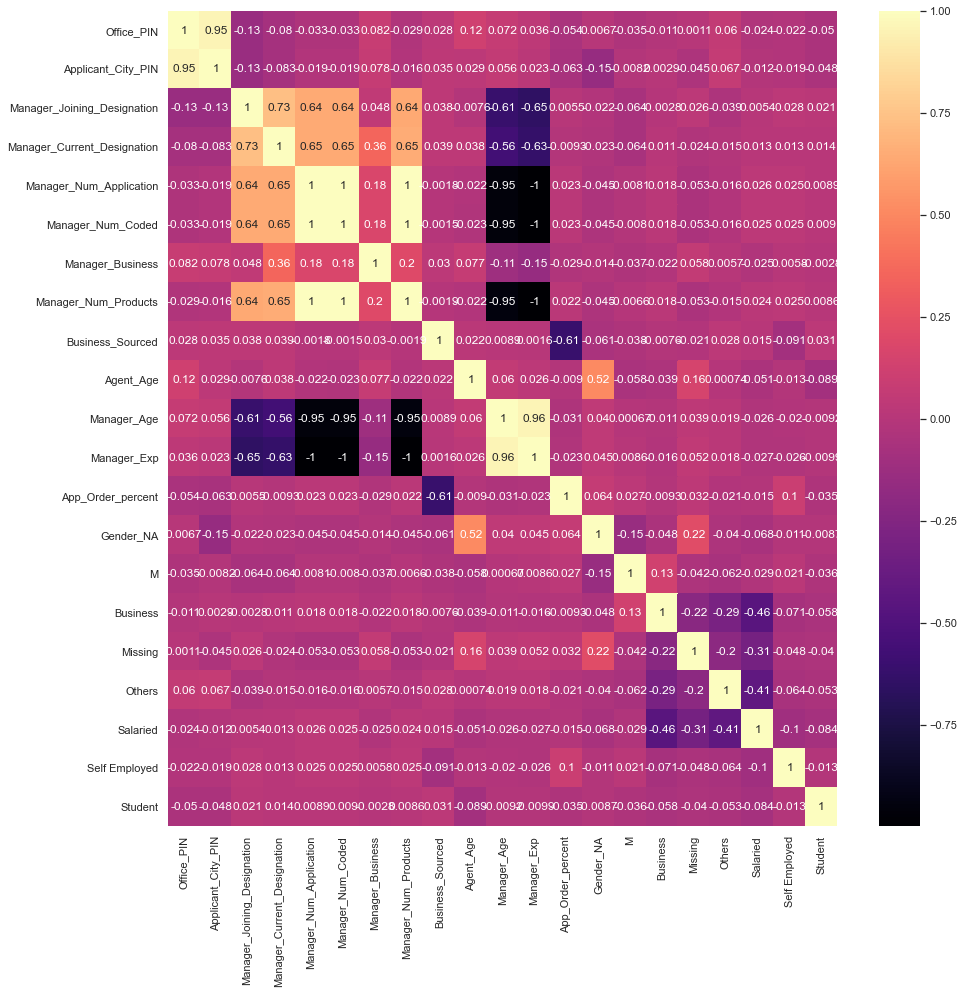

In [82]:
plt.figure(figsize=(15,15))
correlation = train.corr(method="pearson")
sns.heatmap(correlation, annot=True, cmap="magma")

<h2>5. Modelling</h2>

In the modelling part, the following models are used :
* XGBoost (Mean CV Scores : 0.88256, Variance in CV Scores : 0.00564)
* Light Gradient Boosting (Mean CV Scores : 0.8826, Variance in CV Scores : 0.00338)
* AdaBoost (Mean CV Scores : 0.8755 0.000684)

The scoring metric is **<i>ROC_AUC</i>**

All the models provided similar accuracy. However Light Gradient Boosting had the least Variance in CV Scores. Hence Light Gradient Boosting was selected as the final model

**Randomized Search CV** is used for tuning and finding the best parameters under **roc_auc scoring**

In [83]:
# Spliting target variable from train dataset

X = train.drop(columns=['Business_Sourced'])
y = train[['Business_Sourced']]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h3>5.1. XGBoost Model</h3>

In [85]:
xgb_model = XGBClassifier(objective="binary:logistic", n_estimators=200, learning_rate=0.05, max_depth=6, 
                          subsample=0.75, colsample_bytree=0.8, min_child_weight=1, n_jobs=-1, random_state=42,
                          eval_metric="auc") 

In [86]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
# xgb_model.fit(X_train,y_train)
# proba = xgb_model.predict_proba(X_train)[:,1]
# train_score = roc_auc_score(y_train,proba)
# cv_score = cross_val_score(xgb_model,X,y,scoring="roc_auc",verbose=2,cv =10)

xgb_model.fit(X_train,y_train)
proba = xgb_model.predict_proba(X_train)[:,1]
train_score = roc_auc_score(y_train,proba)
cv_score = cross_val_score(xgb_model,X_train,y_train,scoring="roc_auc",verbose=2,cv =skf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.6s
[CV] END .................................................... total time=   0.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s finished


In [88]:
print('Train score : {}', train_score)
print('CV Scores : {}', cv_score)
print('Mean CV Scores : {}, Variance in CV Scores : {}'.format(cv_score.mean(), cv_score.std()))

Train score : {} 0.9700453786368719
CV Scores : {} [0.86082977 0.86863745 0.89622409 0.89196991 0.87913233]
Mean CV Scores : 0.8793587087614758, Variance in CV Scores : 0.013429830293104785


In [89]:
xgb_model.fit(X_train,y_train)
proba = xgb_model.predict_proba(X_test)[:,1]
test_score = roc_auc_score(y_test,proba)
print('Test score : {}', test_score)

Test score : {} 0.8851817085350345


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

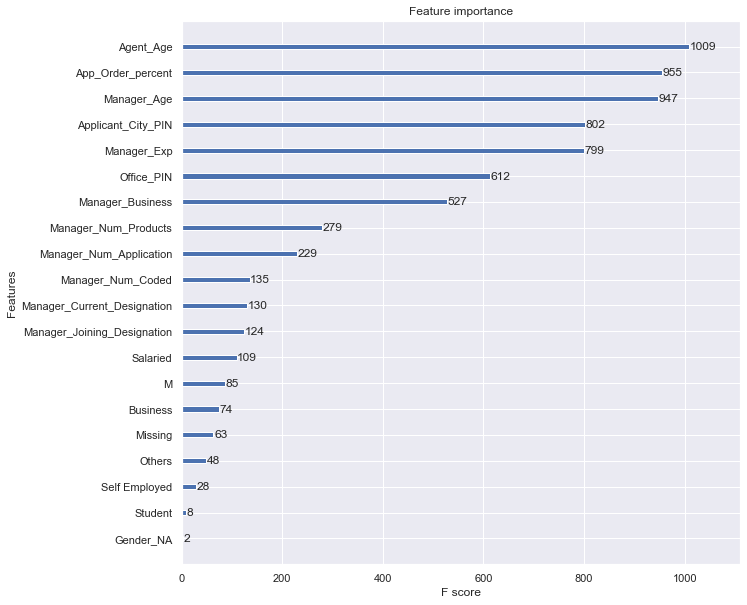

In [90]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgb_model , ax=ax)

In [91]:
xgb_model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='auc',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=-1,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.75, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [92]:
pred = xgb_model.predict_proba(test)[:,1]

In [93]:
submission = pd.DataFrame()
submission['ID'] = df_test['ID']
submission["Business_Sourced"] = pred

submission.to_csv('xgb_predictions_cv.csv', index=False)

<h3>5.2. Light Gradient Boosting Model</h3>

In [94]:
param_dist = {"n_estimators":sp_randint(40,100),
              "colsample_bytree":np.array([0.5,0.6,0.7,0.8,0.9,1]),
              "subsample":np.array([0.5,0.6,0.7,0.8,0.9,1]),
              "reg_lambda":np.array([1e-5,1e-4,1e-3,1e-2,0.1,1,10,100]),
              "reg_alpha":np.array([1e-5,1e-4,1e-3,1e-2,0.1,1,10,100]),
              "min_child_samples": sp_randint(25,65),
                "max_depth": sp_randint(1,20)}

clf_lgbm = LGBMClassifier(boosting_type = "gbdt",n_jobs =-1,random_state = 42)

# Randomized Search CV for finding the best parameters under roc_auc scoring

lgbm_cv = RandomizedSearchCV(clf_lgbm, param_distributions=param_dist,
                                   n_iter=20,cv=skf,scoring='roc_auc',random_state=42,verbose=1)

lgbm_cv.fit(X_train,y_train)

print('mean test scores',lgbm_cv.cv_results_['mean_test_score'])
print(lgbm_cv.cv_results_['mean_test_score'].mean(), lgbm_cv.cv_results_['mean_test_score'].std())

Fitting 5 folds for each of 20 candidates, totalling 100 fits
mean test scores [0.87809424 0.8777569  0.87643342 0.87421255 0.87902895 0.87807845
 0.87723666 0.88075734 0.87531137 0.87711707 0.87743873 0.87737277
 0.87632952 0.87821072 0.87811637 0.87240747 0.87851574 0.87565036
 0.87341215 0.8776141 ]
0.8769547435938524 0.0019247317540936344


In [95]:
print('The best parameters {}'.format(lgbm_cv.best_params_))

The best parameters {'colsample_bytree': 0.6, 'max_depth': 4, 'min_child_samples': 49, 'n_estimators': 99, 'reg_alpha': 1.0, 'reg_lambda': 0.0001, 'subsample': 0.6}


In [96]:
lgb_clf_model = LGBMClassifier(colsample_bytree=0.6, max_depth=4, min_child_samples=49,
               n_estimators=99, random_state=42, reg_alpha=1.0,
               reg_lambda=0.0001, subsample=0.6)

# lgb_clf_model.fit(X_train,y_train)

# proba = lgb_clf_model.predict_proba(X_test)[:,1]
# test_score = roc_auc_score(y_test,proba)

# print('Train Score : ',test_score)

lgb_clf_model.fit(X_train,y_train)
proba = lgb_clf_model.predict_proba(X_train)[:,1]
train_score = roc_auc_score(y_train,proba)
cv_score = cross_val_score(lgb_clf_model,X_train,y_train,scoring="roc_auc",verbose=2,cv =skf)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s finished


In [97]:
print('Train score : {}', train_score)
print('CV Scores : {}', cv_score)
print('Mean CV Scores : {}, Variance in CV Scores : {}'.format(cv_score.mean(), cv_score.std()))

Train score : {} 0.9190551928963077
CV Scores : {} [0.86304597 0.87203015 0.89772051 0.88971398 0.88127608]
Mean CV Scores : 0.8807573372439217, Variance in CV Scores : 0.01231337812346206


In [98]:
lgb_clf_model.fit(X_train,y_train)
proba = lgb_clf_model.predict_proba(X_test)[:,1]
test_score = roc_auc_score(y_test,proba)
print('Test score : {}', test_score)

Test score : {} 0.8844061932075554


In [99]:
lgb_clf_model.fit(X,y)

LGBMClassifier(colsample_bytree=0.6, max_depth=4, min_child_samples=49,
               n_estimators=99, random_state=42, reg_alpha=1.0,
               reg_lambda=0.0001, subsample=0.6)

In [100]:
pred = lgb_clf_model.predict_proba(test)[:,1]
lgbm_submission = pd.DataFrame()
lgbm_submission['ID'] = df_test['ID']
lgbm_submission["Business_Sourced"] = pred

lgbm_submission.to_csv('lgbm_pred_cv.csv', index=False)

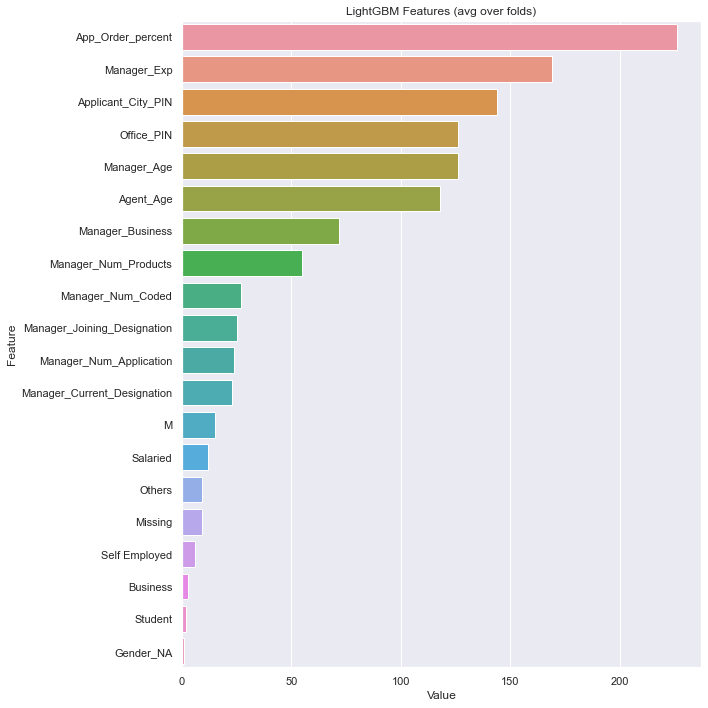

In [101]:
feature_imp = pd.DataFrame(sorted(zip(lgb_clf_model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()

<h3>5.3. Ada Boost Model</h3>

In [100]:
param_dist = {"n_estimators":sp_randint(40,100),
              "learning_rate":np.array([0.5,0.6,0.7,0.8,0.9,1])}

ada_boost_mdl = AdaBoostClassifier(random_state=42)

ada_boost_cv = RandomizedSearchCV(ada_boost_mdl, param_distributions=param_dist,
                                   n_iter=20,cv=8,scoring='roc_auc',random_state=42,verbose=1)

ada_boost_cv.fit(X_train,y_train)

print('mean test scores',ada_boost_cv.cv_results_['mean_test_score'])
print(ada_boost_cv.cv_results_['mean_test_score'].mean(), ada_boost_cv.cv_results_['mean_test_score'].std())

Fitting 8 folds for each of 20 candidates, totalling 160 fits
mean test scores [0.87560004 0.87432306 0.87644024 0.87560601 0.87522784 0.87580428
 0.87586102 0.87455467 0.875549   0.87396259 0.87546552 0.87512549
 0.8756799  0.87566452 0.87601788 0.87654855 0.87670537 0.87528304
 0.87525849 0.87488011]
0.8754778808914336 0.0006836847459639681


In [101]:
print('The best parameters {}'.format(ada_boost_cv.best_params_))

The best parameters {'learning_rate': 0.6, 'n_estimators': 67}


In [102]:
ada_boost = AdaBoostClassifier(learning_rate=0.9, n_estimators=60, random_state=42)

In [103]:
ada_boost.fit(X_train,y_train)

proba = ada_boost.predict_proba(X_test)[:,1]
test_score = roc_auc_score(y_test,proba)

print('Train Score : ',test_score)

Train Score :  0.8836999885391823


In [104]:
ada_boost.fit(X,y)

AdaBoostClassifier(learning_rate=0.9, n_estimators=60, random_state=42)

In [105]:
# pred = ada_boost.predict_proba(test)[:,1]
# ada_boost_submission = pd.DataFrame()
# ada_boost_submission['ID'] = df_test['ID']
# ada_boost_submission["Business_Sourced"] = pred

# ada_boost_submission.to_csv('ada_boost_predictions_ohe.csv', index=False)